Declaration

In [1]:
import numpy as np    
import pandas as pd 
from sklearn import preprocessing 
import seaborn as sns
import pylab as py
import matplotlib as mpl
from matplotlib import cm

from matplotlib import pyplot as plt
from datetime import datetime

Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading data

In [ ]:
aprdata=pd.read_csv('/content/drive/My Drive/wiseproject/Copy of uber-raw-data-apr14.csv')
maydata=pd.read_csv('/content/drive/My Drive/wiseproject/Copy of uber-raw-data-may14.csv')
jundata=pd.read_csv('/content/drive/My Drive/wiseproject/Copy of uber-raw-data-jun14.csv')
juldata=pd.read_csv('/content/drive/My Drive/wiseproject/Copy of uber-raw-data-jul14.csv')
augdata=pd.read_csv('/content/drive/My Drive/wiseproject/Copy of uber-raw-data-aug14.csv')
sepdata=pd.read_csv('/content/drive/My Drive/wiseproject/Copy of uber-raw-data-sep14.csv')
janjunedata=pd.read_csv('/content/drive/My Drive/wiseproject/Copy of uber-raw-data-janjune-15.csv')
janfebfoildata=pd.read_csv('/content/drive/My Drive/wiseproject/Copy of Uber-Jan-Feb-FOIL.csv')


In [ ]:
janjunedata

In [ ]:
aprdata

In [ ]:
maydata

In [ ]:
jundata

In [ ]:
juldata

In [ ]:
augdata

In [ ]:
sepdata

In [ ]:
aprdata.describe()

**checking missing values**

In [ ]:
nan_values = aprdata.isna()
nan_columns = nan_values.any()
columns_with_nan = aprdata.columns[nan_columns].tolist()
columns_with_nan 

nan_values = maydata.isna()
nan_columns = nan_values.any()
columns_with_nan = maydata.columns[nan_columns].tolist()
columns_with_nan

nan_values = jundata.isna()
nan_columns = nan_values.any()
columns_with_nan = aprdata.columns[nan_columns].tolist()
columns_with_nan 

nan_values = juldata.isna()
nan_columns = nan_values.any()
columns_with_nan = juldata.columns[nan_columns].tolist()
columns_with_nan 

nan_values = augdata.isna()
nan_columns = nan_values.any()
columns_with_nan = augdata.columns[nan_columns].tolist()
columns_with_nan

nan_values = sepdata.isna()
nan_columns = nan_values.any()
columns_with_nan = sepdata.columns[nan_columns].tolist()
columns_with_nan 



In [ ]:
aprdata['Base'].unique()

Change in uber pickups from april to sept 2014


In [ ]:
labels=["April",'May','jun','july','aug','sep']
data = [len(aprdata),len(maydata),len(jundata),len(juldata),len(augdata),len(sepdata)]
plt.figure(figsize=(30,8))
plt.plot(labels,data) 

plt.ylabel('Number of pickups ', fontsize=20)
plt.xlabel('Months', fontsize=20)
plt.xticks(fontsize=20)
plt.show()

In [ ]:
data = [len(aprdata),len(maydata),len(jundata),len(juldata),len(augdata),len(sepdata)]
data

Data visualisation (base)


In [ ]:

plt.figure(figsize = (18,12))
plt.subplot(232)
data =sepdata['Base'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('September',color="Red")

In [ ]:
plt.figure(figsize = (18,12))
plt.subplot(231)
data =aprdata['Base'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('April',color="Red")


plt.subplot(232)
data =maydata['Base'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('May',color="Red")


plt.subplot(233)
data =jundata['Base'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('June',color="Red")


plt.subplot(234)
data =juldata['Base'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('July',color="Red")


plt.subplot(235)
data =augdata['Base'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('August',color="Red")


plt.subplot(236)
data =sepdata['Base'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Sept',color="Red")
plt.show()


**Time to day and month(Conversion)**

In [ ]:
aprdata['Date/Time'] = pd.to_datetime(aprdata['Date/Time'], format="%m/%d/%Y %H:%M:%S")
aprdata['Month'] = aprdata['Date/Time'].dt.month_name()
aprdata['DayOfWeekNum'] = aprdata['Date/Time'].dt.dayofweek
aprdata['MonthDayNum'] = aprdata['Date/Time'].dt.day
aprdata['Hour'] = aprdata['Date/Time'].dt.hour
aprdata['Minute'] = aprdata['Date/Time'].dt.minute
aprdata['DayOfWeek'] = aprdata['Date/Time'].dt.day_name()

maydata['Date/Time'] = pd.to_datetime(maydata['Date/Time'], format="%m/%d/%Y %H:%M:%S")
maydata['DayOfWeekNum'] = maydata['Date/Time'].dt.dayofweek
maydata['Month'] = maydata['Date/Time'].dt.month_name()
maydata['MonthDayNum'] = maydata['Date/Time'].dt.day
maydata['Hour'] = maydata['Date/Time'].dt.hour
maydata['Minute'] = maydata['Date/Time'].dt.minute
maydata['DayOfWeek'] = maydata['Date/Time'].dt.day_name()



jundata['Date/Time'] = pd.to_datetime(jundata['Date/Time'], format="%m/%d/%Y %H:%M:%S")
jundata['DayOfWeekNum'] = jundata['Date/Time'].dt.dayofweek
jundata['Month'] = jundata['Date/Time'].dt.month_name()
jundata['MonthDayNum'] = jundata['Date/Time'].dt.day
jundata['Hour'] = jundata['Date/Time'].dt.hour
jundata['Minute'] = jundata['Date/Time'].dt.minute
jundata['DayOfWeek'] = jundata['Date/Time'].dt.day_name()



juldata['Date/Time'] = pd.to_datetime(juldata['Date/Time'], format="%m/%d/%Y %H:%M:%S")
juldata['DayOfWeekNum'] = juldata['Date/Time'].dt.dayofweek
juldata['Month'] = juldata['Date/Time'].dt.month_name()
juldata['MonthDayNum'] = juldata['Date/Time'].dt.day
juldata['Hour'] = juldata['Date/Time'].dt.hour
juldata['Minute'] = juldata['Date/Time'].dt.minute
juldata['DayOfWeek'] = juldata['Date/Time'].dt.day_name()



augdata['Date/Time'] = pd.to_datetime(augdata['Date/Time'], format="%m/%d/%Y %H:%M:%S")
augdata['DayOfWeekNum'] = augdata['Date/Time'].dt.dayofweek
augdata['Month'] = augdata['Date/Time'].dt.month_name()
augdata['MonthDayNum'] = augdata['Date/Time'].dt.day
augdata['Hour'] = augdata['Date/Time'].dt.hour
augdata['Minute'] = augdata['Date/Time'].dt.minute
augdata['DayOfWeek'] = augdata['Date/Time'].dt.day_name()



sepdata['Date/Time'] = pd.to_datetime(sepdata['Date/Time'], format="%m/%d/%Y %H:%M:%S")
sepdata['DayOfWeekNum'] = sepdata['Date/Time'].dt.dayofweek
sepdata['Month'] = sepdata['Date/Time'].dt.month_name()
sepdata['MonthDayNum'] = sepdata['Date/Time'].dt.day
sepdata['Hour'] = sepdata['Date/Time'].dt.hour
sepdata['Minute'] = sepdata['Date/Time'].dt.minute
sepdata['DayOfWeek'] = sepdata['Date/Time'].dt.day_name()




In [ ]:
hourly_data = aprdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata)#loc=(1.05,0)space of box
plt.legend(title='Monday')
ax = fig.add_subplot(432)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata1)#loc=(1.05,0)space of box
plt.legend(title='Tuesday')

ax = fig.add_subplot(433)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata2)
plt.legend(title='Wednesday')

ax = fig.add_subplot(434)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata3)
plt.legend(title='Thursday')
ax = fig.add_subplot(435)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata4)
plt.legend(title='Friday')

ax = fig.add_subplot(436)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata5)
plt.legend(title='Saturday')
ax = fig.add_subplot(438)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata6)
plt.legend(title='Sunday')
plt.show()


In [ ]:
!pip install -U matplotlib


!pip install matplotlib-venn

In [ ]:

fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431,projection='3d')
ax.bar(mdata['MonthDayNum'],mdata['ride_count'],mdata['Hour'],zdir='y')
ax.set_xlabel('Mondays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(432,projection='3d')
ax.bar(mdata1['MonthDayNum'],mdata1['ride_count'],mdata1['Hour'],zdir='y')
ax.set_xlabel('Tuesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(433,projection='3d')
ax.bar(mdata2['MonthDayNum'],mdata2['ride_count'],mdata2['Hour'],zdir='y')
ax.set_xlabel('Wednesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(434,projection='3d')
ax.bar(mdata3['MonthDayNum'],mdata3['ride_count'],mdata3['Hour'],zdir='y')
ax.set_xlabel('Thursdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(435,projection='3d')
ax.bar(mdata4['MonthDayNum'],mdata4['ride_count'],mdata4['Hour'],zdir='y')
ax.set_xlabel('Fridays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(436,projection='3d')
ax.bar(mdata5['MonthDayNum'],mdata5['ride_count'],mdata5['Hour'],zdir='y')
ax.set_xlabel('Saturdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(437,projection='3d')
ax.bar(mdata6['MonthDayNum'],mdata6['ride_count'],mdata6['Hour'],zdir='y')
ax.set_xlabel('Sundays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

plt.show()



In [ ]:
aprdata.head()

In [ ]:
aprdata.info()



# **Uber pickups based on Day**

In [ ]:
labels=["mon","tues","wed","thur","fri","sat","sun"]
plt.figure(figsize = (18,26))
plt.subplot(321)
plt.title("April",color="red")
data = aprdata['DayOfWeekNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.xticks(points.sort_values(),labels,fontsize=20)
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)


plt.subplot(322)
plt.title("May",color="red")
data = maydata['DayOfWeekNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(points.sort_values(),labels,fontsize=20)


plt.subplot(323)
plt.title("June",color="red")
data = jundata['DayOfWeekNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(points.sort_values(),labels,fontsize=20)


plt.subplot(324)
plt.title("July",color="red")
data = juldata['DayOfWeekNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.xticks(points.sort_values(),labels,fontsize=20)
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)


plt.subplot(325)
plt.title("August",color="red")
data = augdata['DayOfWeekNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(points.sort_values(),labels,fontsize=20)


plt.subplot(326)
plt.title("September",color="red")
data =sepdata['DayOfWeekNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(points.sort_values(),labels,fontsize=20)
plt.show()


In [ ]:

plt.figure(figsize = (18,26))
plt.subplot(321)
sns.countplot(aprdata['DayOfWeekNum'])
plt.title('April',color='red')
plt.ylabel('Number of pickups', fontsize=10)
plt.xlabel('Days', fontsize=10)

plt.subplot(322)
sns.countplot(maydata['DayOfWeekNum'])
plt.title('May',color='red')
plt.ylabel('Number of pickups', fontsize=10)
plt.xlabel('Days', fontsize=10)

plt.subplot(323)
sns.countplot(jundata['DayOfWeekNum'])
plt.title('June',color='red')
plt.ylabel('Number of pickups', fontsize=10)
plt.xlabel('Days', fontsize=10)

plt.subplot(324)
sns.countplot(juldata['DayOfWeekNum'])
plt.title('July',color='red')
plt.ylabel('Number of pickups', fontsize=10)
plt.xlabel('Days', fontsize=10)

plt.subplot(325)
sns.countplot(augdata['DayOfWeekNum'])
plt.title('August',color='red')
plt.ylabel('Number of pickups', fontsize=10)
plt.xlabel('Days', fontsize=10)

plt.subplot(326)
sns.countplot(sepdata['DayOfWeekNum'])
plt.title('September',color='red')
plt.ylabel('Number of pickups', fontsize=10)
plt.xlabel('Days', fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(18,26))
plt.subplot(322)
sns.countplot(sepdata['DayOfWeekNum'])
plt.title('September',color='red')
plt.ylabel('Number of pickups', fontsize=10)
plt.xlabel('Days', fontsize=10)

# **Uber pickups based on months**

In [ ]:
plt.figure(figsize = (18,26))
plt.subplot(321)
plt.title("April",color="red")
data = aprdata['MonthDayNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(322)
plt.title("May",color="red")
data = maydata['MonthDayNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(323)
plt.title("June",color="red")
data = jundata['MonthDayNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(324)
plt.title("July",color="red")
data = juldata['MonthDayNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(325)
plt.title("August",color="red")
data = augdata['MonthDayNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(326)
plt.title("September",color="red")
data =sepdata['MonthDayNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(fontsize=20)
plt.show()


In [ ]:
data = aprdata['MonthDayNum'].value_counts()
points = data.index
points

# **Average RideCount According to Hour and WeekDays**

In [ ]:

mayhourly_data = maydata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()#series
mayhourly_data = mayhourly_data.reset_index()#dataframe
mayhourly_data = mayhourly_data.rename(columns = {'Date/Time':'ride_count'})
#weekday
mayweekday_hourly_avg = mayhourly_data.groupby(['DayOfWeekNum','Hour'])['ride_count'].mean()
mayweekday_hourly_avg = mayweekday_hourly_avg.reset_index()
mayweekday_hourly_avg = mayweekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})
mayweekday_hourly_avg 


junhourly_data = jundata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()#series
junhourly_data = junhourly_data.reset_index()#dataframe
junhourly_data = junhourly_data.rename(columns = {'Date/Time':'ride_count'})
#weekday
junweekday_hourly_avg = junhourly_data.groupby(['DayOfWeekNum','Hour'])['ride_count'].mean()
junweekday_hourly_avg = junweekday_hourly_avg.reset_index()
junweekday_hourly_avg = junweekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})

julhourly_data = juldata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()#series
julhourly_data = julhourly_data.reset_index()#dataframe
julhourly_data = julhourly_data.rename(columns = {'Date/Time':'ride_count'})
#weekday
julweekday_hourly_avg = julhourly_data.groupby(['DayOfWeekNum','Hour'])['ride_count'].mean()
julweekday_hourly_avg = julweekday_hourly_avg.reset_index()
julweekday_hourly_avg = julweekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})

aughourly_data = augdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()#series
aughourly_data = aughourly_data.reset_index()#dataframe
aughourly_data = aughourly_data.rename(columns = {'Date/Time':'ride_count'})
#weekday
augweekday_hourly_avg = aughourly_data.groupby(['DayOfWeekNum','Hour'])['ride_count'].mean()
augweekday_hourly_avg = augweekday_hourly_avg.reset_index()
augweekday_hourly_avg = augweekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})

sephourly_data = sepdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()#series
sephourly_data = sephourly_data.reset_index()#dataframe
sephourly_data = sephourly_data.rename(columns = {'Date/Time':'ride_count'})
#weekday
sepweekday_hourly_avg = sephourly_data.groupby(['DayOfWeekNum','Hour'])['ride_count'].mean()
sepweekday_hourly_avg = sepweekday_hourly_avg.reset_index()
sepweekday_hourly_avg = sepweekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})



# **plot with weeks vs hour**

In [ ]:
fig = plt.figure(figsize=(18,26))
ax = fig.add_subplot(321)
sns.pointplot(ax=ax,x='Hour',y='average_rides',hue='DayOfWeekNum', 
             data = aprweekday_hourly_avg)
plt.legend(title='April WeekDayNumber from Monday')#loc=(1.05,0)space of box

ax = fig.add_subplot(322)
sns.pointplot(ax=ax,x='Hour',y='average_rides',hue='DayOfWeekNum', 
             data = mayweekday_hourly_avg)
plt.legend(title='May WeekDayNumber from Monday')#loc=(1.05,0)space of box

ax = fig.add_subplot(323)
sns.pointplot(ax=ax,x='Hour',y='average_rides',hue='DayOfWeekNum', 
             data = junweekday_hourly_avg)
plt.legend(title='jun WeekDayNumber from Monday')

ax = fig.add_subplot(324)
sns.pointplot(ax=ax,x='Hour',y='average_rides',hue='DayOfWeekNum', 
             data = julweekday_hourly_avg)
plt.legend(title='jul WeekDayNumber from Monday')

ax = fig.add_subplot(325)
sns.pointplot(ax=ax,x='Hour',y='average_rides',hue='DayOfWeekNum', 
             data = augweekday_hourly_avg)
plt.legend(title='Aug WeekDayNumber from Monday')

ax = fig.add_subplot(326)
sns.pointplot(ax=ax,x='Hour',y='average_rides',hue='DayOfWeekNum', 
             data = sepweekday_hourly_avg)
plt.legend(title='sep WeekDayNumber from Monday')
plt.show()
#mrng 7 and evng 4 to 7 

All days in a month


In [ ]:
d = aprdata.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
d.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day')

# **Most uber pickups in a day**





In [ ]:
plt.figure(figsize = (18,26))
plt.subplot(321)
plt.title("April",color="red")
data = aprdata['Hour'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Hours', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(322)
plt.title("May",color="red")
data = maydata['Hour'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Hours', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(323)
plt.title("June",color="red")
data = jundata['Hour'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('hours', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(324)
plt.title("July",color="red")
data = juldata['Hour'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('hours', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(325)
plt.title("August",color="red")
data = augdata['Hour'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('hours', fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(326)
plt.title("September",color="red")
data =sepdata['Hour'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('hours', fontsize=20)
plt.xticks(fontsize=20)
plt.show()
#16,17 -more uber pickups

# **Scatter plot for lat and lon**

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(aprdata['Lat'],aprdata['Lon'],c='r')
plt.title('April',color='red')
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(maydata['Lat'],maydata['Lon'],c='g')
plt.title('May',color='red')
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(jundata['Lat'],jundata['Lon'],c='b')
plt.title('June',color='red')
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(juldata['Lat'],juldata['Lon'],c='black')
plt.title('July',color='red')
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(augdata['Lat'],augdata['Lon'],c='pink')
plt.title('August',color='red')
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(sepdata['Lat'],sepdata['Lon'])
plt.title('September',color='red')
plt.show()

In [ ]:
apr =sepdata.groupby(['Hour','DayOfWeekNum'])['Date/Time'].count()#series
apr = apr.reset_index()#dataframe
apr = apr.rename(columns = {'Date/Time':'ride_count'})
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='DayOfWeekNum',y='ride_count',hue='Hour', 
             data = apr)

plt.legend(loc=(1.05,0),title='Hour')
plt.show()

In [ ]:
def count_rows(rows):
    return len(rows)
base_weekday = sepdata.groupby(['Base','DayOfWeek']).apply(count_rows).unstack()
base_weekday.head()

plt.figure(figsize = (12,8))

#seaborn heatmap function 
hm = sns.heatmap(base_weekday, cmap=cm.YlGnBu, linewidth = .5)


In [ ]:
def count_rows(rows):
    return len(rows)
base_weekday = aprdata.groupby(['Hour','MonthDayNum']).apply(count_rows).unstack()
base_weekday.head()

plt.figure(figsize = (12,8))
#seaborn heatmap function 
hm = sns.heatmap(base_weekday, cmap=cm.YlGnBu, linewidth = .5)
hm.set(title="Trips by Hour and Day")

In [ ]:
plt.figure(figsize = (18,12))
plt.subplot(231)
data =sepdata['DayOfWeek'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'},explode = (0.3, 0, 0,0,0,0,0))


In [ ]:
aprdata['MonthDayNum'].hist(bins=29, range=(0,29),color='b')

# **Heatmap base and day of week**

In [ ]:
def count_rows(rows):
    return len(rows)
base_weekday = maydata.groupby(['DayOfWeek', 'Base']).apply(count_rows).unstack()
base_weekday.head()

plt.figure(figsize = (12,8))

#seaborn heatmap function 
hm = sns.heatmap(base_weekday, cmap=cm.YlGnBu, linewidth = .5)
hm.set(title="Trips by Hour and Day");

In [ ]:
def count_rows(rows):
    return len(rows)
base_weekday = sepdata.groupby(['Hour','DayOfWeek']).apply(count_rows).unstack()
base_weekday.head()

plt.figure(figsize = (12,8))

#seaborn heatmap function 
hm = sns.heatmap(base_weekday, cmap=cm.YlGnBu, linewidth = .5)


In [ ]:
aprdata.groupby(['Base','Month']).count().unstack('Base')['Date/Time'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Journeys by Month')

In [ ]:
plt.figure(figsize=(10,8))
aprbase = sepdata.groupby(['DayOfWeek','Base'])['Date/Time'].count()
aprbase = aprbase.reset_index()
sns.barplot(x='DayOfWeek',y='Date/Time',hue='Base',data = aprbase)
plt.legend(loc=(1.05,0),title='Base')

In [ ]:
aprdata

# **Visualise using map**

# April

In [ ]:

week_map = aprdata
week_map.shape
limit=10000
datalimit = week_map.iloc[0:limit, :]
datalimit.shape


LDN_COORDINATES = (40.7128, -74.0060)
my_map = folium.Map(location=LDN_COORDINATES, zoom_start=12)
for lat, lng in zip(aprdatalimit['Lat'], datalimit['Lon'])
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map)  
    
display(my_map)
my_map.save('aprmap.html')

# May

In [ ]:

week_map = maydata
week_map.shape

limit=10000
datalimit = week_map.iloc[0:limit, :]
datalimit.shape


LDN_COORDINATES = (40.7128, -74.0060)
my_map = folium.Map(location=LDN_COORDINATES, zoom_start=12)
for lat, lng in zip(aprdatalimit['Lat'], datalimit['Lon']):
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map)  
    
display(my_map)
my_map.save('maymap.html')

# June

In [ ]:

week_map = jundata
week_map.shape

limit=10000
datalimit = week_map.iloc[0:limit, :]
datalimit.shape


LDN_COORDINATES = (40.7128, -74.0060)
my_map = folium.Map(location=LDN_COORDINATES, zoom_start=12)
for lat, lng in zip(aprdatalimit['Lat'], datalimit['Lon']):
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map)  
    
display(my_map)
my_map.save('junemap.html')

# July

In [ ]:

week_map = juldata
week_map.shape

limit=10000
datalimit = week_map.iloc[0:limit, :]
datalimit.shape


LDN_COORDINATES = (40.7128, -74.0060)
my_map = folium.Map(location=LDN_COORDINATES, zoom_start=12)
for lat, lng in zip(aprdatalimit['Lat'], datalimit['Lon']):
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map)  
    
display(my_map)
my_map.save('julymap.html')

August

In [ ]:

week_map = augdata
week_map.shape

limit=10000
datalimit = week_map.iloc[0:limit, :]
datalimit.shape


LDN_COORDINATES = (40.7128, -74.0060)
my_map = folium.Map(location=LDN_COORDINATES, zoom_start=12)
for lat, lng in zip(aprdatalimit['Lat'], datalimit['Lon']):
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map)  
    
display(my_map)
my_map.save('augmap.html')

September

In [ ]:

week_map = sepdata
week_map.shape
limit=10000
datalimit = week_map.iloc[0:limit, :]
datalimit.shape
LDN_COORDINATES = (40.7128, -74.0060)
my_map = folium.Map(location=LDN_COORDINATES, zoom_start=12)
for lat, lng in zip(aprdatalimit['Lat'], datalimit['Lon']): 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map)    
display(my_map)
my_map.save('sepmap.html')

# **Combining**

In [ ]:
data = aprdata.append([maydata,jundata,juldata,augdata,sepdata], ignore_index=True)

data['Date/Time'] = pd.to_datetime(data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
data['Month'] = data['Date/Time'].dt.month_name()
data['DayOfWeek'] = data['Date/Time'].dt.day_name()

data['MonthDayNum'] = data['Date/Time'].dt.day
data['Hour'] = data['Date/Time'].dt.hour
data['Minute'] = data['Date/Time'].dt.minute
data.head()


# Pickups by month

In [ ]:
agg_month = data.groupby(['Month'], as_index = False)['Base'].count()

months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
plt.xlabel('Month',fontsize=10)
plt.ylabel('Total in million')
plt.bar(months,agg_month['Base'] ,color = 'crimson',width = [0.5]*6)


In [ ]:
data.groupby(['Base','Month']).count().unstack('Base')['Date/Time'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.legend(loc=(1.05,0))

plt.ylabel('Total Journeys')
plt.title('Journeys by Month')

In [ ]:
data.groupby(['Month','Hour']).count().unstack('Month')['Date/Time'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.legend(loc=(1.05,0))

plt.ylabel('Total Journeys')
plt.title('Journeys by Month')

In [ ]:
data.groupby(['DayOfWeek','Month']).count().unstack('DayOfWeek')['Date/Time'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.legend(loc=(1.05,0))

plt.ylabel('Total Journeys')
plt.title('Journeys by Month')

In [ ]:
def count_rows(rows):
    return len(rows)
hour_day = data.groupby(['Hour', 'MonthDayNum']).apply(count_rows).unstack()
hour_day.head()

Heat Map by hour and day

In [ ]:
plt.figure(figsize = (12,8))

#seaborn heatmap function 
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by Hour and Day")

# Heat map of hour and weekday

In [ ]:
def count_rows(rows):
    return len(rows)
hour_week = data.groupby(['Hour', 'DayOfWeek']).apply(count_rows).unstack()
hour_week.head()

plt.figure(figsize = (12,8))

#seaborn heatmap function 
hm = sns.heatmap(hour_week, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by Hour and WeekDay")

HeatMap of day and month

In [ ]:
def count_rows(rows):
    return len(rows)
day_month = data.groupby(['MonthDayNum', 'Month']).apply(count_rows).unstack()
day_month.head()

plt.figure(figsize = (12,8))

#seaborn heatmap function 
hm = sns.heatmap(day_month, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by Day and Month");



Heatmap of month and weekday

In [ ]:
def count_rows(rows):
    return len(rows)
month_week = data.groupby(['Month', 'DayOfWeek']).apply(count_rows).unstack()
hour_week.head()

plt.figure(figsize = (12,8))

#seaborn heatmap function 
hm = sns.heatmap(month_week, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by Month and WeekDay");

Spatial Visualisation

In [ ]:
mpl.rcParams['agg.path.chunksize'] = 100000
datareduced = aprdata.drop_duplicates(['Lat','Lon'])
Lonreduced = datareduced['Lon']
Latreduced  = datareduced['Lat']
plt.figure(figsize=(16, 12))

plt.plot(Lonreduced, Latreduced,'.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups from April to September 2014')

plt.show()


# ***JANJUNEDATA FOR 2015***

In [ ]:
janjunedata

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [ ]:
janjunedata.describe()

,locationID
count,1.427048e+07
mean,1.520574e+02
std,7.159620e+01
min,1.000000e+00
25%,9.200000e+01
50%,1.570000e+02
75%,2.300000e+02
max,2.650000e+02


# **check ,fill missing values**

In [ ]:
nan_values = janjunedata.isna()
nan_columns = nan_values.any()
columns_with_nan = janjunedata.columns[nan_columns].tolist()
columns_with_nan 

[]

In [ ]:
data =janjunedata['Affiliated_base_num'].value_counts()
data
#janjunedata[janjunedata['Affiliated_base_num'].isnull()].index.tolist()

B02764    4514516
B02682    3448698
B02617    1946933
B02598    1287723
B02765    1038379
           ...   
B02547          2
B02267          2
B02597          2
B02684          1
B02796          1
Name: Affiliated_base_num, Length: 284, dtype: int64

In [ ]:
janjunedata['Affiliated_base_num'] = janjunedata['Affiliated_base_num'].fillna("Nan")
p = janjunedata['Affiliated_base_num'].mode()
janjunedata['Affiliated_base_num'] = janjunedata['Affiliated_base_num'].replace("Nan","B02764")
janjunedata['Affiliated_base_num'].unique()

array(['B02617', 'B02774', 'B02764', 'B02682', 'B02765', 'B00272',
       'B02401', 'B01087', 'B01197', 'B02512', 'B02729', 'B00227',
       'B02598', 'B00013', 'B02003', 'B00628', 'B02818', 'B00254',
       'B02715', 'B01998', 'B02207', 'B02101', 'B02789', 'B02510',
       'B00412', 'B00111', 'B00477', 'B02806', 'B00448', 'B02664',
       'B02788', 'B01949', 'B02067', 'B00271', 'B02534', 'B02285',
       'B00837', 'B02770', 'B00277', 'B01877', 'B02522', 'B00014',
       'B00789', 'B02216', 'B01875', 'B02749', 'B02406', 'B00296',
       'B02507', 'B02787', 'B00053', 'B02345', 'B02670', 'B02822',
       'B01976', 'B00381', 'B00446', 'B02651', 'B02763', 'B01899',
       'B02732', 'B02016', 'B01913', 'B02588', 'B02644', 'B02835',
       'B02783', 'B02836', 'B02725', 'B02382', 'B02453', 'B02225',
       'B02772', 'B00888', 'B02499', 'B02815', 'B02712', 'B02277',
       'B02769', 'B02202', 'B02254', 'B02814', 'B00608', 'B02480',
       'B02847', 'B00235', 'B02780', 'B02776', 'B02472', 'B004

# **janjune conversion**

In [ ]:
janjunedata['Pickup_date'] = pd.to_datetime(janjunedata['Pickup_date'], format="%Y-%m-%d %H:%M:%S")
janjunedata['Month'] = janjunedata['Pickup_date'].dt.month_name()
janjunedata['DayOfWeekNum'] = janjunedata['Pickup_date'].dt.dayofweek
janjunedata['MonthDayNum'] = janjunedata['Pickup_date'].dt.day
janjunedata['Hour'] = janjunedata['Pickup_date'].dt.hour
janjunedata['Minute'] = janjunedata['Pickup_date'].dt.minute
janjunedata

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,DayOfWeekNum,MonthDayNum,Hour,Minute
0,B02617,2015-05-17 09:47:00,B02617,141,May,6,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,6,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,6,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,6,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,May,6,17,9,47
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,May,4,8,15,43
14270475,B02765,2015-05-08 15:43:00,B02765,263,May,4,8,15,43
14270476,B02765,2015-05-08 15:43:00,B02765,90,May,4,8,15,43
14270477,B02765,2015-05-08 15:44:00,B01899,45,May,4,8,15,44


first 10 pickups on base

Text(0.5, 1.0, 'first 10 Uber pickups')

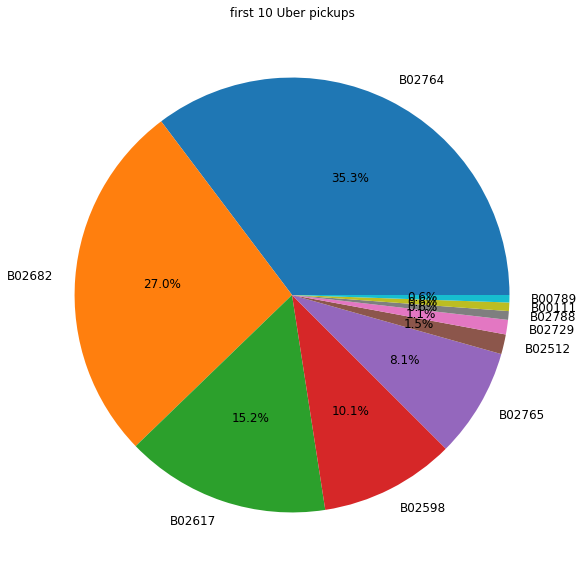

In [ ]:
plt.figure(figsize=(10,10))
data =janjunedata['Affiliated_base_num'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title("first 10 Uber pickups")


last 10 uber pickups on base

Text(0.5, 1.0, 'last 10 Uber pickups')

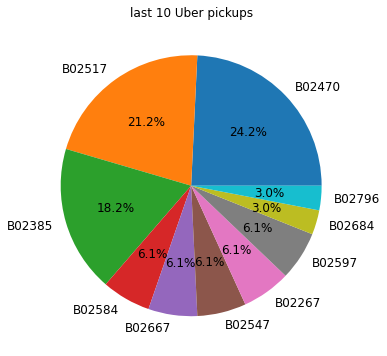

In [ ]:
plt.figure(figsize=(6,6))
data =janjunedata['Affiliated_base_num'].value_counts()[-10:]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title("last 10 Uber pickups")

[Text(0.5, 1.0, 'Trips by base and month')]

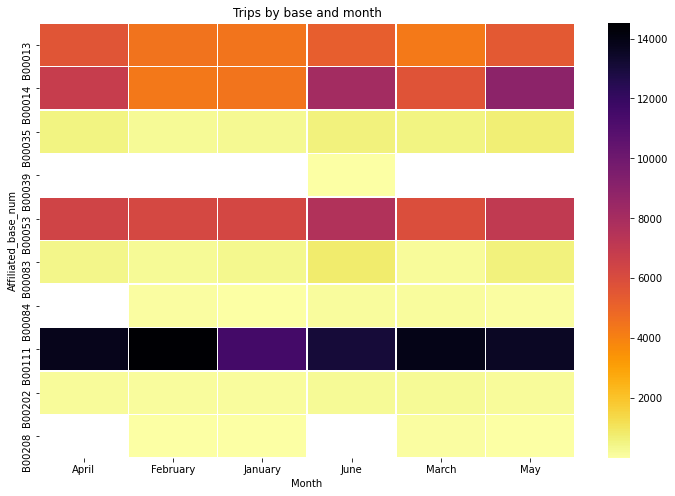

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Affiliated_base_num', 'Month']).apply(count_rows).unstack()
hour_day = hour_day[:10]
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by base and month")

[Text(0.5, 1.0, 'Trips by base and month')]

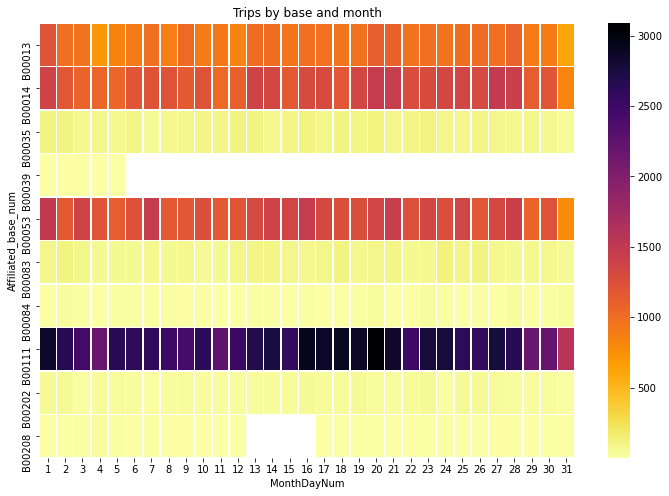

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Affiliated_base_num', 'MonthDayNum']).apply(count_rows).unstack()
hour_day = hour_day[:10]
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by base and month")

[Text(0.5, 1.0, 'Trips by base and Week')]

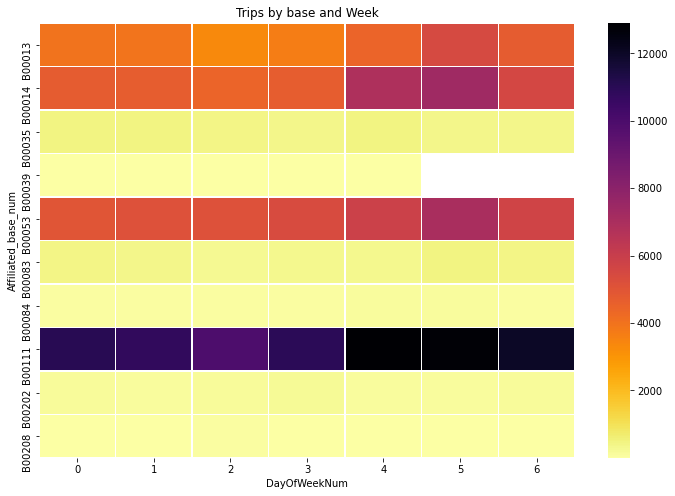

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Affiliated_base_num', 'DayOfWeekNum']).apply(count_rows).unstack()
hour_day = hour_day[:10]
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by base and Week")

[Text(0.5, 1.0, 'Trips by base and Hour')]

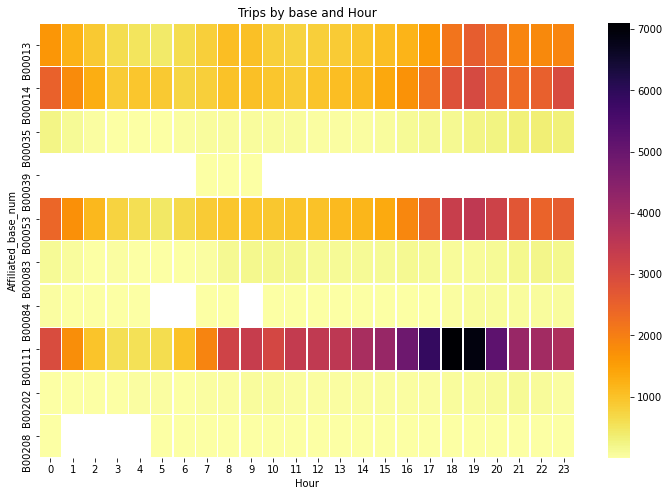

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Affiliated_base_num', 'Hour']).apply(count_rows).unstack()
hour_day = hour_day[:10]
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by base and Hour")

# **total DispatchingBase**

Text(0.5, 1.0, 'Dispatching Uber')

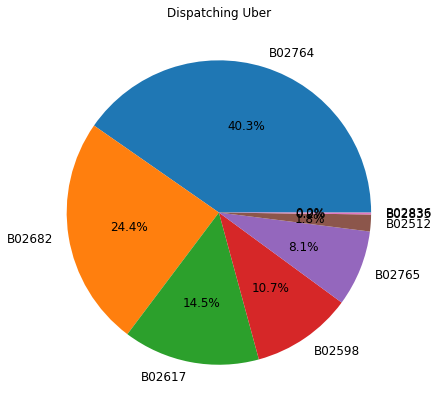

In [ ]:
plt.figure(figsize=(7,7))
data =janjunedata['Dispatching_base_num'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title("Dispatching Uber")

Text(0.5, 0, 'Dispatching bases')

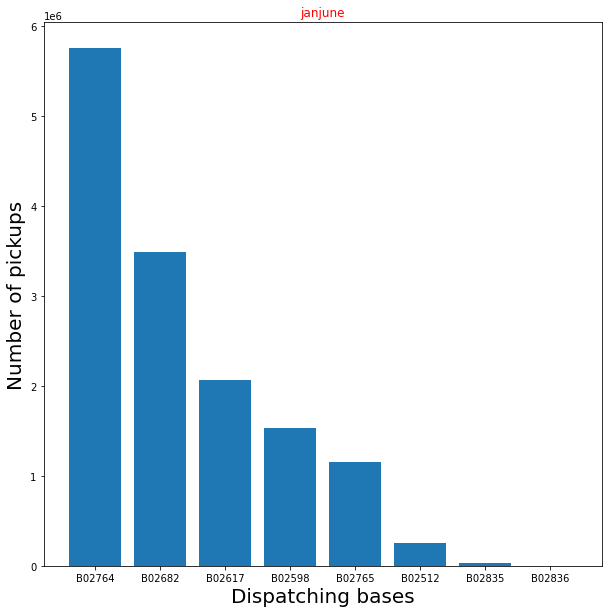

In [ ]:
plt.figure(figsize=(10,10))
plt.title("janjune",color="red")
data = janjunedata['Dispatching_base_num'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Dispatching bases',fontsize=20)

# **Dispatching base by month wise**

[Text(0.5, 1.0, 'Trips by base and month')]

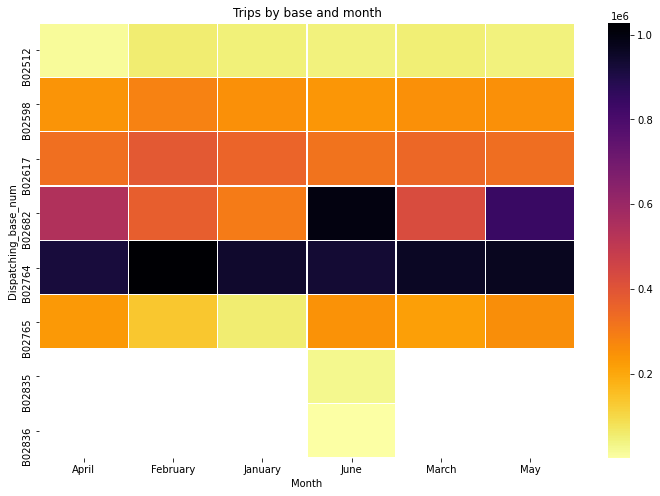

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Dispatching_base_num', 'Month']).apply(count_rows).unstack()
hour_day.head()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by base and month")

[Text(0.5, 1.0, 'Trips by base and week')]

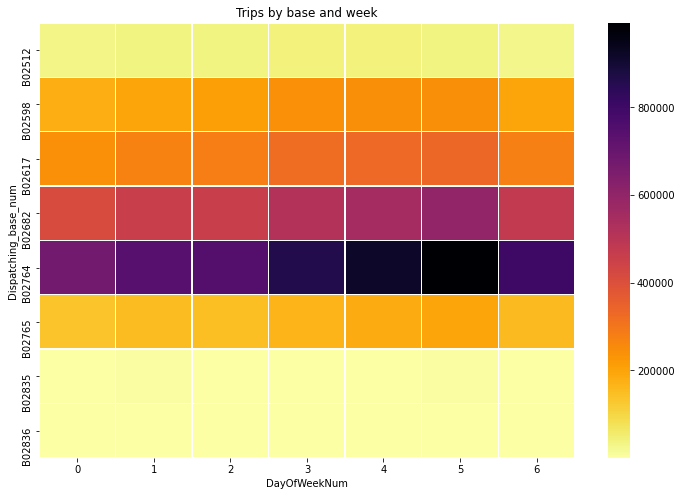

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Dispatching_base_num', 'DayOfWeekNum']).apply(count_rows).unstack()
hour_day.head()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by base and week")

[Text(0.5, 1.0, 'Trips by base and monthday')]

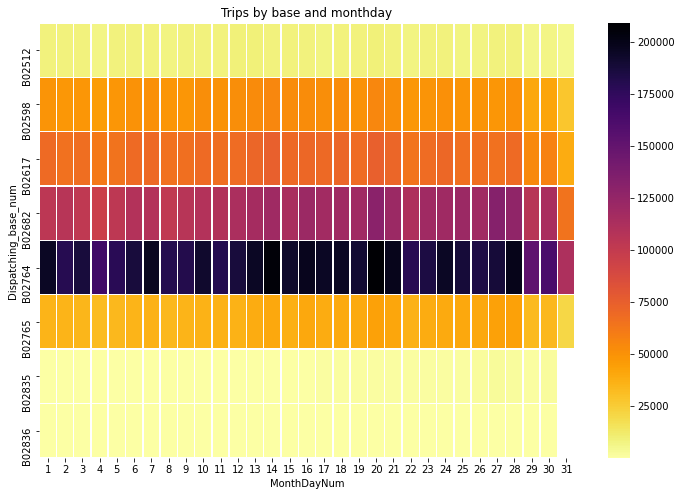

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Dispatching_base_num', 'MonthDayNum']).apply(count_rows).unstack()
hour_day.head()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by base and monthday")

[Text(0.5, 1.0, 'Trips by base and hour')]

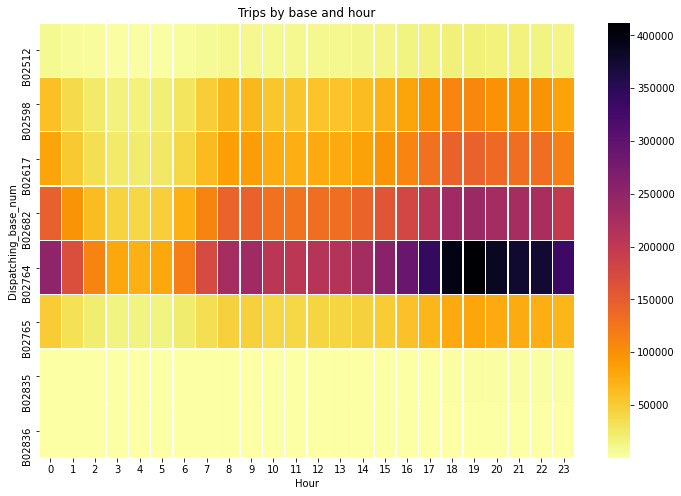

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Dispatching_base_num', 'Hour']).apply(count_rows).unstack()
hour_day.head()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by base and hour")

# Uber pickups Weekwise

([<matplotlib.axis.XTick at 0x7f99f23f4128>,
 [Text(0, 0, 'mon'),
  Text(0, 0, 'tues'),
  Text(0, 0, 'wed'),
  Text(0, 0, 'thur'),
  Text(0, 0, 'fri'),
  Text(0, 0, 'sat'),
  Text(0, 0, 'sun')])

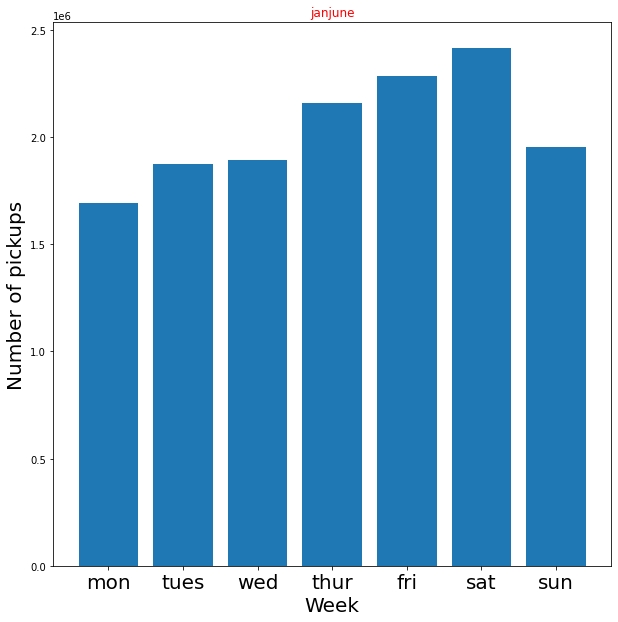

In [ ]:
labels=["mon","tues","wed","thur","fri","sat","sun"]
plt.figure(figsize=(10,10))
plt.title("janjune",color="red")
data = janjunedata['DayOfWeekNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Week', fontsize=20)
plt.xticks(points.sort_values(),labels,fontsize=20)

# Uber pickups day wise in month

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

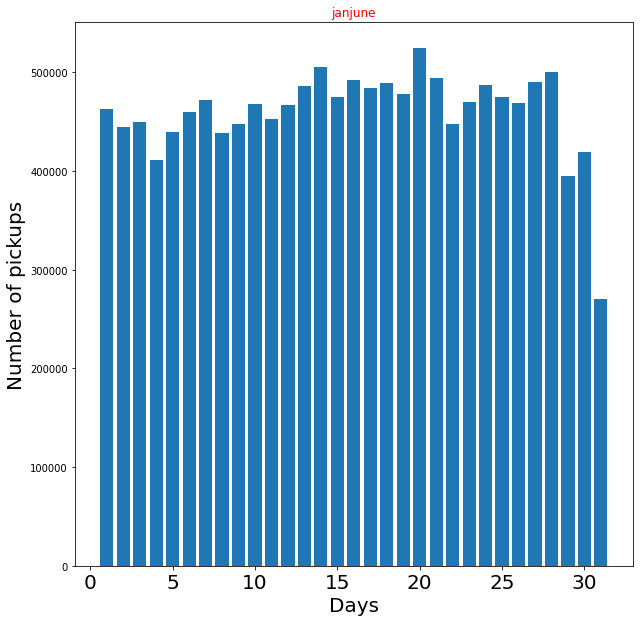

In [ ]:
plt.figure(figsize = (10,10))
plt.title("janjune",color="red")
data = janjunedata['MonthDayNum'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.xticks(fontsize=20)

Uber pickups Monthwise

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

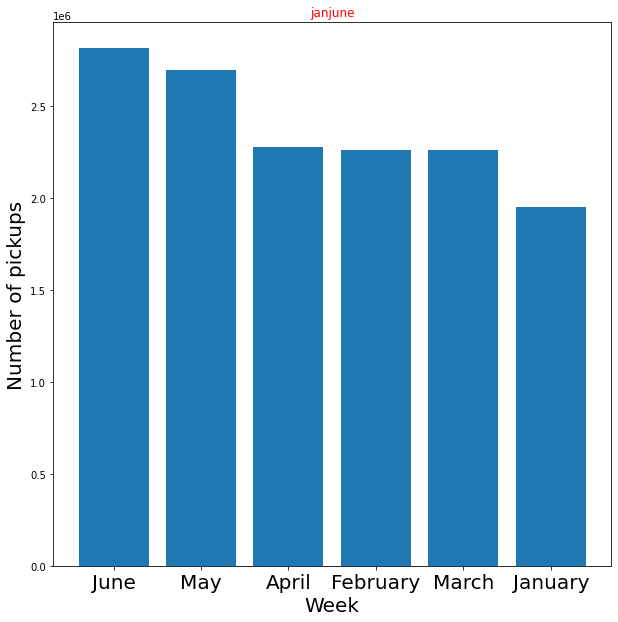

In [ ]:
plt.figure(figsize=(10,10))
plt.title("janjune",color="red")
data = janjunedata['Month'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Week', fontsize=20)
plt.xticks(fontsize=20)

Uber pickups Hour wise

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

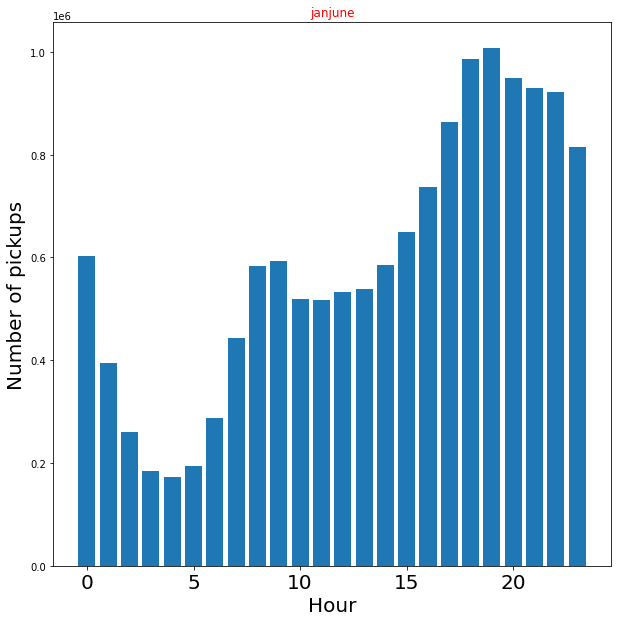

In [ ]:
plt.figure(figsize=(10,10))
plt.title("janjune",color="red")
data = janjunedata['Hour'].value_counts()
points = data.index
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of pickups', fontsize=20)
plt.xlabel('Hour', fontsize=20)
plt.xticks(fontsize=20)

First 10 most uber pickups locations 

Text(0.5, 1.0, 'locations')

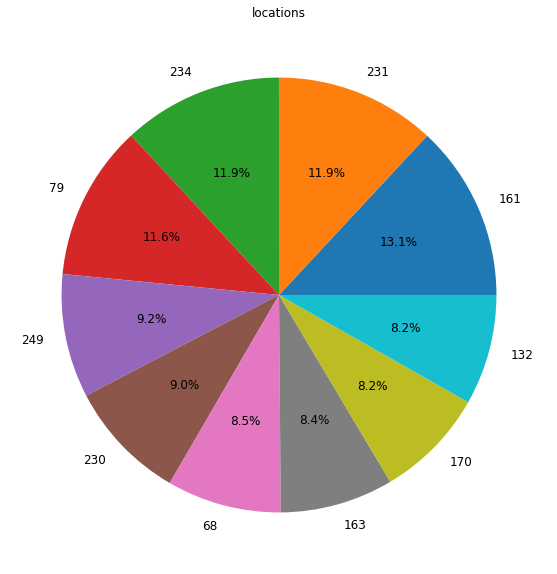

In [ ]:
plt.figure(figsize=(10,10))
data =janjunedata['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title("locations")

Lat 10 uber pickups loc

Text(0.5, 1.0, 'locations')

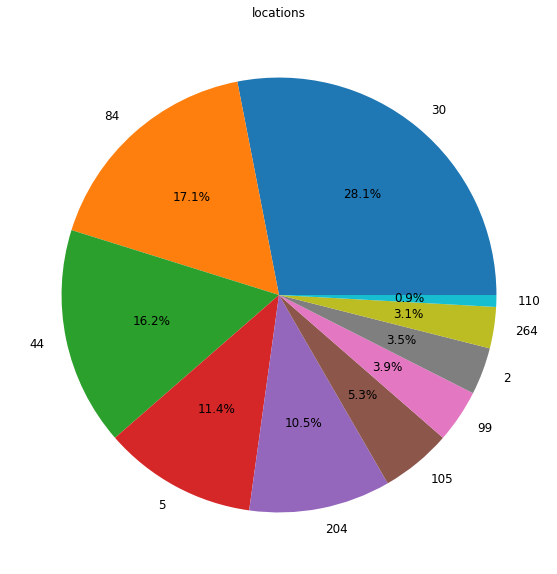

In [ ]:
plt.figure(figsize=(10,10))
data =janjunedata['locationID'].value_counts()[-10:]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title("locations")

# **Getting locations based on Months**

In [ ]:
month = []
m = ['May', 'January', 'March', 'February', 'June', 'April']
for i in range(0,6):
  month.append(janjunedata.loc[janjunedata['Month'] == m[i]])
month[0]['locationID'].value_counts()

79     78190
161    76583
234    75340
231    72084
249    59919
       ...  
5          6
105        3
2          2
99         2
264        1
Name: locationID, Length: 261, dtype: int64

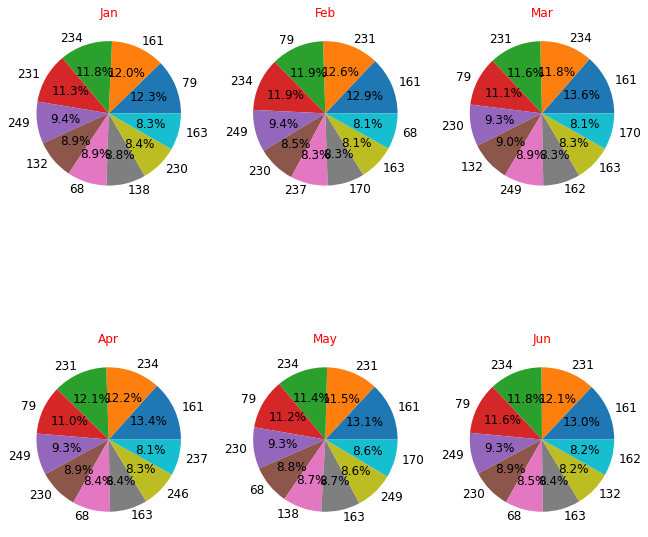

In [ ]:
plt.figure(figsize = (11,11))
plt.subplot(231)
data =month[0]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Jan',color="Red")


plt.subplot(232)
data =month[1]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Feb',color="Red")


plt.subplot(233)
data =month[2]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Mar',color="Red")


plt.subplot(234)
data =month[3]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Apr',color="Red")


plt.subplot(235)
data =month[4]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('May',color="Red")


plt.subplot(236)
data =month[5]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Jun',color="Red")
plt.show()


# **Getting  loc data by week wise**

In [ ]:
week =[]
for i in range(0,7):
  week.append(janjunedata.loc[janjunedata['DayOfWeekNum'] ==i])
week[0]['locationID'].value_counts()

161    62848
132    54705
231    48176
234    48033
138    46157
       ...  
5          3
44         2
99         1
105        1
2          1
Name: locationID, Length: 259, dtype: int64



# **First 10 most location for particular week**

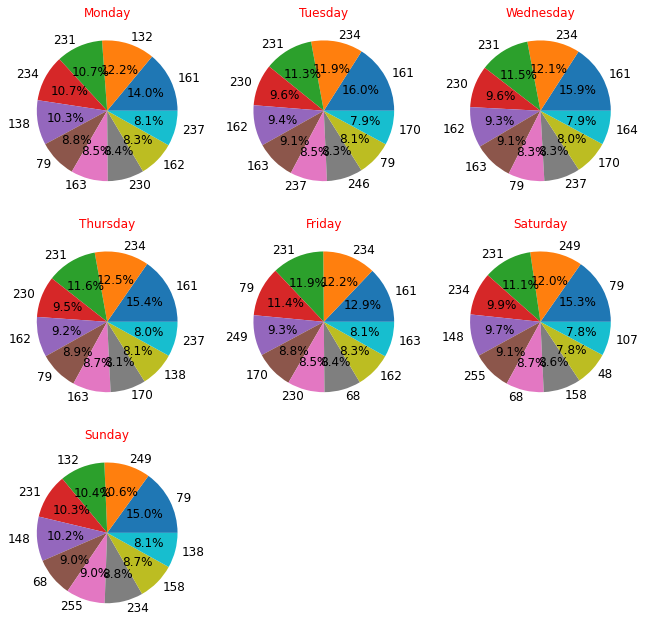

In [ ]:
plt.figure(figsize = (11,11))
plt.subplot(331)
data =week[0]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Monday',color="Red")


plt.subplot(332)
data =week[1]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Tuesday',color="Red")


plt.subplot(333)
data =week[2]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Wednesday',color="Red")


plt.subplot(334)
data =week[3]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Thursday',color="Red")


plt.subplot(335)
data =week[4]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Friday',color="Red")


plt.subplot(336)
data =week[5]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Saturday',color="Red")


plt.subplot(337)
data =week[6]['locationID'].value_counts()[:10]
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title('Sunday',color="Red")
plt.show()


# **Based on hours weekly data**

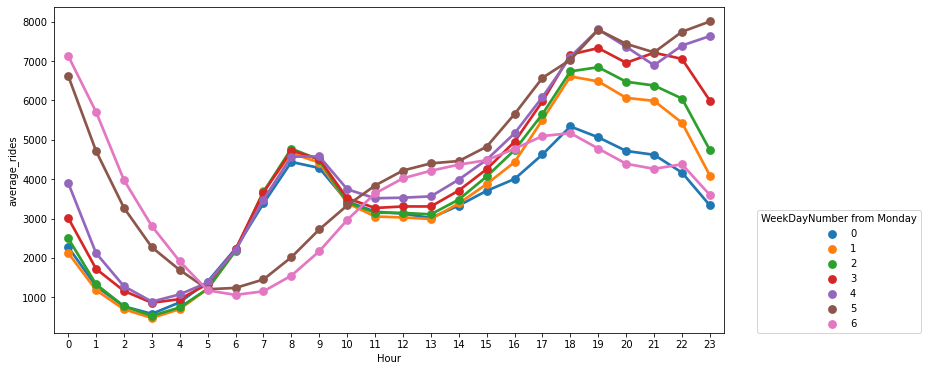

In [ ]:
hourly_data = janjunedata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Pickup_date'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Pickup_date':'ride_count'})



weekday_hourly_avg = hourly_data.groupby(['DayOfWeekNum','Hour'])['ride_count'].mean()
weekday_hourly_avg = weekday_hourly_avg.reset_index()
weekday_hourly_avg = weekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})
weekday_hourly_avg


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Hour',y='average_rides',hue='DayOfWeekNum', 
             data = weekday_hourly_avg)
plt.legend(loc=(1.05,0),title='WeekDayNumber from Monday')
plt.show()

# **Based on months week ride count**

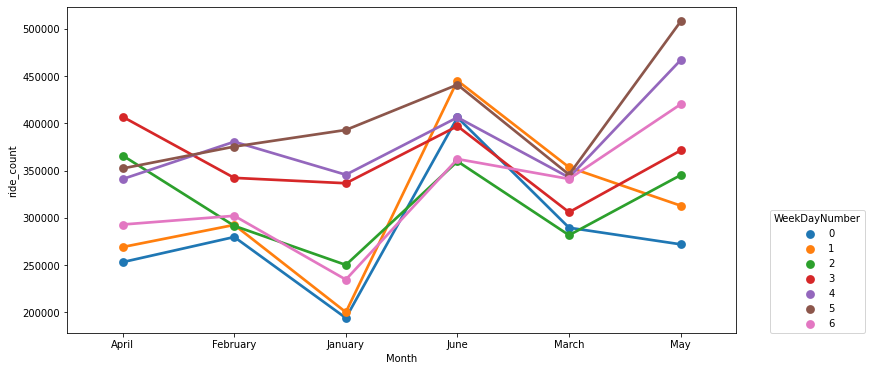

In [ ]:
data = janjunedata.groupby(['Month','DayOfWeekNum'])['Pickup_date'].count()
data = data.reset_index()
data = data.rename(columns = {'Pickup_date':'ride_count'})
data

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Month',y='ride_count',hue='DayOfWeekNum', 
             data = data)
plt.legend(loc=(1.05,0),title='WeekDayNumber')
plt.show()

# **Based on months day wise count**

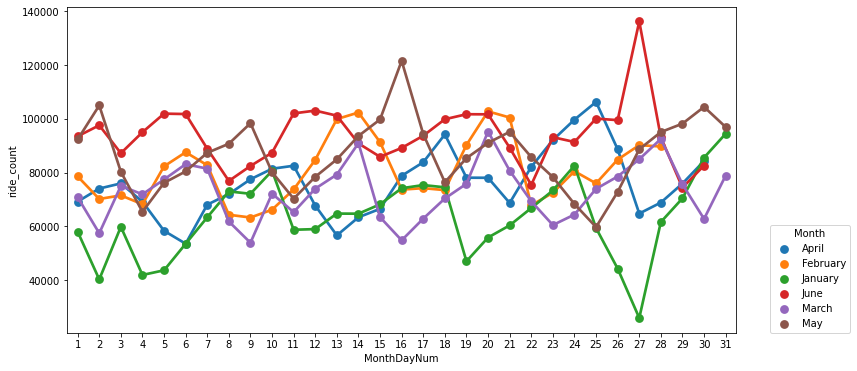

In [ ]:
data = janjunedata.groupby(['Month','MonthDayNum'])['Pickup_date'].count()
data = data.reset_index()
data = data.rename(columns = {'Pickup_date':'ride_count'})
data

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='ride_count',hue='Month', 
             data = data)
plt.legend(loc=(1.05,0),title='Month')
plt.show()

# **Based on hour months uber pickups**

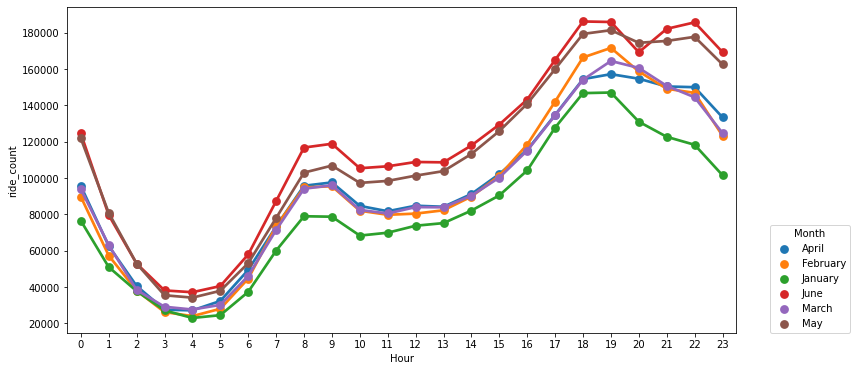

In [ ]:
data = janjunedata.groupby(['Hour','Month'])['Pickup_date'].count()
data = data.reset_index()
data = data.rename(columns = {'Pickup_date':'ride_count'})
data

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='Month', 
             data = data)
plt.legend(loc=(1.05,0),title='Month')
plt.show()

Text(0.5, 1.0, 'Journeys by Month')

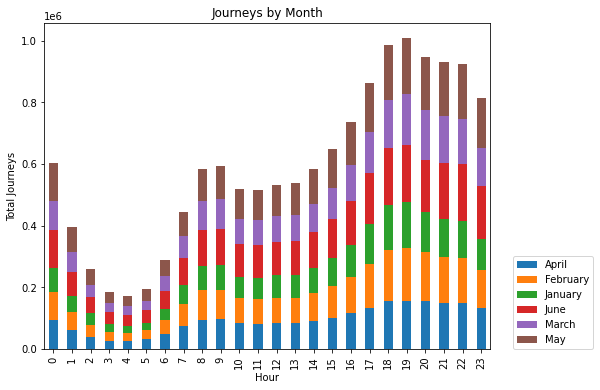

In [ ]:
janjunedata.groupby(['Month','Hour']).count().unstack('Month')['Pickup_date'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.legend(loc=(1.05,0))

plt.ylabel('Total Journeys')
plt.title('Journeys by Month')

# **Based on Monthsdays and hours**

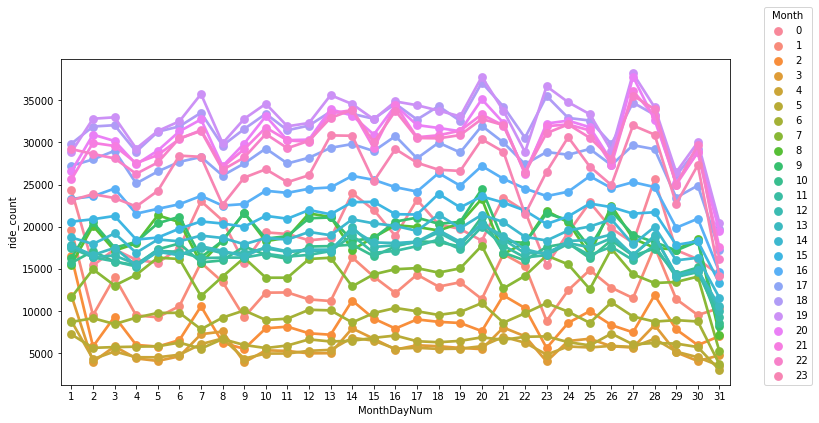

In [ ]:
data = janjunedata.groupby(['Hour','MonthDayNum'])['Pickup_date'].count()
data = data.reset_index()
data = data.rename(columns = {'Pickup_date':'ride_count'})
data

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='ride_count',hue='Hour', 
             data = data)
plt.legend(loc=(1.05,0),title='Month')
plt.show()

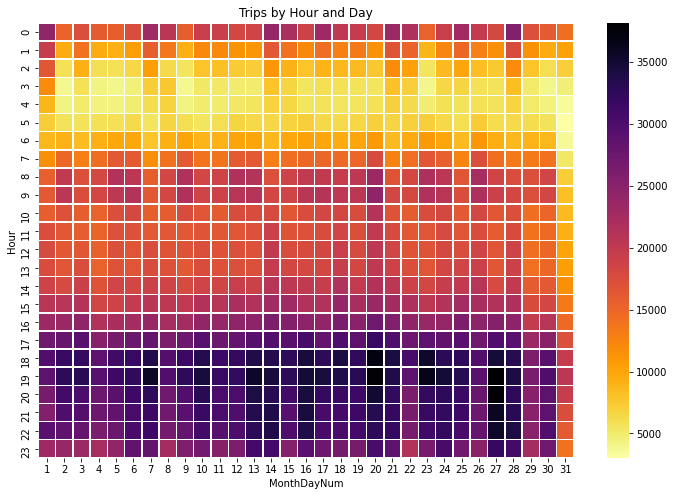

In [ ]:
from matplotlib import cm
def count_rows(rows):
    return len(rows)
hour_day = janjunedata.groupby(['Hour', 'MonthDayNum']).apply(count_rows).unstack()
hour_day.head()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.inferno_r, linewidth = .5)
hm.set(title="Trips by Hour and Day");

In [ ]:
janjunedata

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,DayOfWeekNum,MonthDayNum,Hour,Minute
0,B02617,2015-05-17 09:47:00,B02617,141,May,6,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,6,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,6,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,6,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,May,6,17,9,47
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,May,4,8,15,43
14270475,B02765,2015-05-08 15:43:00,B02765,263,May,4,8,15,43
14270476,B02765,2015-05-08 15:43:00,B02765,90,May,4,8,15,43
14270477,B02765,2015-05-08 15:44:00,B01899,45,May,4,8,15,44


# **JAN_FEB_FOIL**

In [ ]:
janfebfoildata


# **Check missing values**

In [ ]:
nan_values = janfebfoildata.isna()
nan_columns = nan_values.any()
columns_with_nan = janfebfoildata.columns[nan_columns].tolist()
columns_with_nan 

# Dispatching base

In [ ]:
plt.figure(figsize=(6,6))
data =janfebfoildata['dispatching_base_number'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
plt.title("Dispatching Uber")

In [ ]:
plt.figure(figsize=(6,6))
data =janfebfoildata['dispatching_base_number'].value_counts()
reorder = data.index
sizes = data.values
plt.bar(reorder,sizes,color='r')
plt.title("Dispatching Uber")

# **Conversion**

In [ ]:
janfebfoildata['date'] = pd.to_datetime(janfebfoildata['date'], format="%m/%d/%Y")
janfebfoildata['Month'] = janfebfoildata['date'].dt.month_name()
janfebfoildata['MonthDayNum'] = janfebfoildata['date'].dt.day
janfebfoildata['DayOfWeek'] = janfebfoildata['date'].dt.day_name()
janfebfoildata

# Based on Month week

In [ ]:
janfebfoildata.groupby(['DayOfWeek','Month']).count().unstack('DayOfWeek')['date'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.legend(loc=(1.05,0))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month');

# Based on week,Month

In [ ]:
janfebfoildata.groupby(['DayOfWeek','Month']).count().unstack('Month')['date'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.legend(loc=(1.05,0))
plt.ylabel('Total Journeys')
plt.title('Journeys by week')

# Dispatching base and active vehicles

In [ ]:
plt.bar(janfebfoildata['dispatching_base_number'],janfebfoildata['active_vehicles']) 
plt.ylabel('Active vehicles', fontsize=10)
plt.xlabel('Bases', fontsize=10)
plt.xticks(fontsize=10)
plt.show()


In [ ]:
sns.pointplot(x=janfebfoildata['dispatching_base_number'],y=janfebfoildata['active_vehicles'])

# Dispatching base and trips

In [ ]:
plt.bar(janfebfoildata['dispatching_base_number'],janfebfoildata['trips']) 
plt.ylabel('Active vehicles', fontsize=10)
plt.xlabel('Bases', fontsize=10)
plt.xticks(fontsize=10)
plt.show()


In [ ]:
sns.pointplot(x=janfebfoildata['dispatching_base_number'],y=janfebfoildata['active_vehicles'])

# Trips based on Month and Monthdaynum

In [ ]:
data = janfebfoildata.groupby(['MonthDayNum','Month'])['trips'].sum()
data1 = data.reset_index()

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='trips',hue='Month',
             data = data1)

plt.legend(loc=(1.05,0),title='Month')
plt.show()

# Active vehicles based on Month and MonthDayNum

In [ ]:
data = janfebfoildata.groupby(['MonthDayNum','Month'])['active_vehicles'].sum()
data1 = data.reset_index()

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='active_vehicles',hue='Month',
             data = data1)

plt.legend(loc=(1.05,0),title='Month')
plt.show()

# Trips based on Month and DayOfWeek

In [ ]:
data = janfebfoildata.groupby(['DayOfWeek','Month'])['trips'].sum()
data1 = data.reset_index()

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='DayOfWeek',y='trips',hue='Month',
             data = data1)

plt.legend(loc=(1.05,0),title='Month')
plt.show()

# Active vehicles based on Month and DayOfWeek

In [ ]:
data = janfebfoildata.groupby(['DayOfWeek','Month'])['active_vehicles'].sum()
data1 = data.reset_index()

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='DayOfWeek',y='active_vehicles',hue='Month',
             data = data1)

plt.legend(loc=(1.05,0),title='Month')
plt.show()


Web deployment by Flask

In [ ]:
from flask import Flask, render_template, request, jsonify,send_file


In [ ]:
!pip install flask-ngrok

# **Flask implementation**

In [ ]:

from flask_ngrok import run_with_ngrok
from flask import Flask
from io import BytesIO
import jinja2
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.pyplot as plt

In [ ]:
%mkdir templates -p



In [ ]:
app = Flask(__name__,static_folder='static')
my_loader = jinja2.ChoiceLoader([app.jinja_loader,jinja2.FileSystemLoader('/content/static'),])
app.jinja_loader=my_loader
run_with_ngrok(app) 

@app.route("/")
def home():
   return render_template('index.html')

#April
@app.route("/Apr14")
def aprprint():
  return render_template("Aprdata.html")


@app.route("/UberPickupBase")
def baseprint():
   fig,ax=plt.subplots()
   data =aprdata['Base'].value_counts()
   reorder = data.index
   sizes = data.values
   plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'})
   plt.title('April',color="Red")
   canvas = FigureCanvas(fig)
   img1 = BytesIO()
   fig.savefig(img1)
   img1.seek(0)
   return send_file(img1,mimetype='image/png')


@app.route("/aprLatLon")
def latprint():
   fig,ax=plt.subplots()
   plt.scatter(aprdata['Lat'],aprdata['Lon'],c='r')
   plt.title('April',color='red')
   canvas = FigureCanvas(fig)
   img2 = BytesIO()
   fig.savefig(img2)
   img2.seek(0)
   return send_file(img2,mimetype='image/png')

#AprWeek
@app.route("/aprweek")
def aprshow():
  return render_template('AprWeek.html')

@app.route("/baseaprweek")
def baseaprweek():
  fig,ax=plt.subplots()
  sns.countplot(aprdata['DayOfWeekNum'])
  canvas = FigureCanvas(fig)
  img3 = BytesIO()
  fig.savefig(img3)
  img3.seek(0)
  return send_file(img3,mimetype='image/png')
@app.route("/aprpie")
def aprpie():
  fig,ax=plt.subplots()
  reorder = apr1.index
  sizes = apr1.values
  plt.pie(sizes, labels=reorder, autopct='%1.1f%%',textprops={'size': 'larger'},explode = (0.3, 0, 0,0,0,0,0))
  canvas = FigureCanvas(fig)
  img4 = BytesIO()
  fig.savefig(img4)
  img4.seek(0)
  return send_file(img4,mimetype='image/png')
@app.route("/weekbaseapr")
def weekbaseapr():
  fig,ax=plt.subplots()
  aprdata['DayOfWeekNum'].hist(bins=7, range=(0,6))
  canvas = FigureCanvas(fig)
  img5 = BytesIO()
  fig.savefig(img5)
  img5.seek(0)
  return send_file(img5,mimetype='image/png')

@app.route("/dayofbase")
def dayofbase():
  fig,ax=plt.subplots()
  aprbase = aprd
  sns.barplot(ax=ax,x='DayOfWeekNum',y='Date/Time',hue='Base',data = aprbase)
  plt.legend(loc=(1.05,0),title='Base')
  canvas = FigureCanvas(fig)
  img6 = BytesIO()
  fig.savefig(img6)
  img6.seek(0)
  return send_file(img6,mimetype='image/png')
@app.route("/minofbase")
def minofbase():
  fig,ax=plt.subplots()
  aprmin= aprdata.groupby(['Minute','DayOfWeekNum']).apply(count_rows).unstack()
  hm = sns.heatmap(aprmin, cmap=cm.YlGnBu, linewidth = .5)
  canvas = FigureCanvas(fig)
  img7 = BytesIO()
  fig.savefig(img7)
  img7.seek(0)
  return send_file(img7,mimetype='image/png')
@app.route("/hourofbase")
def hourofbase():
  fig,ax=plt.subplots()
  aprhour= aprdata.groupby(['Hour','DayOfWeekNum']).apply(count_rows).unstack()
  hm = sns.heatmap(aprhour, cmap=cm.YlGnBu, linewidth = .5)
  canvas = FigureCanvas(fig)
  img8 = BytesIO()
  fig.savefig(img8)
  img8.seek(0)
  return send_file(img8,mimetype='image/png')
#April Month
@app.route("/aprmonth")
def aprmonthshow():
  return render_template('AprMonth.html')

@app.route("/baseaprmonth")
def baseaprmonth():
  fig,ax=plt.subplots()
  sns.countplot(aprdata['MonthDayNum'])
  canvas = FigureCanvas(fig)
  img9 = BytesIO()
  fig.savefig(img9)
  img9.seek(0)
  return send_file(img9,mimetype='image/png')
@app.route("/aprbasemonth")
def aprbasemonth():
  fig,ax=plt.subplots()
  sns.lineplot(ax=ax,x='MonthDayNum',y='ride_count',data = aprday)
  canvas = FigureCanvas(fig)
  img10 = BytesIO()
  fig.savefig(img10)
  img10.seek(0)
  return send_file(img10,mimetype='image/png')
@app.route("/monthaprbase")
def monthaprbase():
  fig,ax=plt.subplots()
  aprdata['MonthDayNum'].hist(bins=30, range=(0,31))
  canvas = FigureCanvas(fig)
  img11 = BytesIO()
  fig.savefig(img11)
  img11.seek(0)
  return send_file(img11,mimetype='image/png')
@app.route("/comparebase")
def comparebase():
  fig,ax=plt.subplots()
  aprbase1= aprdata.groupby(['Base','MonthDayNum']).apply(count_rows).unstack()
  hm = sns.heatmap(aprbase1, cmap=cm.YlGnBu, linewidth = .5)
  canvas = FigureCanvas(fig)
  img12 = BytesIO()
  fig.savefig(img12)
  img12.seek(0)
  return send_file(img12,mimetype='image/png')
@app.route("/hourcompare")
def hourcompare():
  fig,ax=plt.subplots()
  aprhour1= aprdata.groupby(['Hour','MonthDayNum']).apply(count_rows).unstack()
  hm = sns.heatmap(aprhour1, cmap=cm.YlGnBu, linewidth = .5)
  canvas = FigureCanvas(fig)
  img13 = BytesIO()
  fig.savefig(img13)
  img13.seek(0)
  return send_file(img13,mimetype='image/png')
app.run()

In [ ]:
app = Flask(__name__,static_folder='static')
my_loader = jinja2.ChoiceLoader([app.jinja_loader,jinja2.FileSystemLoader('/content/static'),])
app.jinja_loader=my_loader
run_with_ngrok(app) 

@app.route("/")
def home():
   return render_template('f.html')


#April
@app.route("/Apr14")
def aprprint():
  return render_template("Aprdata.html")


#AprWeek
@app.route("/aprweek")
def aprshow():
  return render_template('AprWeek.html')

#April Month
@app.route("/aprmonth")
def aprmonthshow():
  return render_template('AprMonth.html')

#AprHour
@app.route("/aprhour")
def aprhour():
  return render_template('AprHour.html')

app.run()

In [ ]:
apr = aprdata['MonthDayNum'].value_counts()
sns.lineplot(x=apr.index,y=apr.values)


In [ ]:
sns.countplot(aprdata['MonthDayNum'])


In [ ]:
aprdata['MonthDayNum'].hist(bins=30, range=(0,30),color='b')

In [ ]:
def count_rows(rows):
    return len(rows)
#MonthDayNum Vs Hour HeatMap
hour_day = aprdata.groupby(['Hour', 'MonthDayNum']).apply(count_rows).unstack()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day, cmap=cm.YlGnBu, linewidth = .5)

#MonthDayNum Vs Base HeatMap

Base_day = aprdata.groupby(['Base', 'MonthDayNum']).apply(count_rows).unstack()
Base_day.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_day, cmap=cm.YlGnBu, linewidth = .5)


#Point Plots
## groupby operation
hourly_data = aprdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
## reset index
hourly_data = hourly_data.reset_index()
## rename column
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})





## groupby operation
hourly_data = aprdata.groupby(['MonthDayNum','Base','DayOfWeekNum'])['Date/Time'].count()
## reset index
hourly_data = hourly_data.reset_index()
## rename column
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='ride_count',hue='Base', 
             data = hourly_data)

plt.legend(loc=(1.05,0),title='Base')
plt.show()


In [ ]:
# mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
# fig = plt.figure(figsize=(15,16))
# ax = fig.add_subplot(111,projection='3d')
# ax.bar(mdata['MonthDayNum'],mdata['ride_count'],mdata['Hour'],zdir='y')

# ax.set_xlabel('MonthDayNum')
# ax.set_ylabel('Hour')
# ax.set_zlabel('ride_count')

# plt.show()

fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431,projection='3d')
ax.bar(mdata['MonthDayNum'],mdata['ride_count'],mdata['Hour'],zdir='y')
ax.set_xlabel('Mondays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(432,projection='3d')
ax.bar(mdata1['MonthDayNum'],mdata1['ride_count'],mdata1['Hour'],zdir='y')
ax.set_xlabel('Tuesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(433,projection='3d')
ax.bar(mdata2['MonthDayNum'],mdata2['ride_count'],mdata2['Hour'],zdir='y')
ax.set_xlabel('Wednesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(434,projection='3d')
ax.bar(mdata3['MonthDayNum'],mdata3['ride_count'],mdata3['Hour'],zdir='y')
ax.set_xlabel('Thursdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(435,projection='3d')
ax.bar(mdata4['MonthDayNum'],mdata4['ride_count'],mdata4['Hour'],zdir='y')
ax.set_xlabel('Fridays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(436,projection='3d')
ax.bar(mdata5['MonthDayNum'],mdata5['ride_count'],mdata5['Hour'],zdir='y')
ax.set_xlabel('Saturdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(437,projection='3d')
ax.bar(mdata6['MonthDayNum'],mdata6['ride_count'],mdata6['Hour'],zdir='y')
ax.set_xlabel('Sundays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

plt.show()


In [ ]:
hourly_data = aprdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata)#loc=(1.05,0)space of box
plt.legend(title='Mondday')
ax = fig.add_subplot(432)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata1)#loc=(1.05,0)space of box
plt.legend(title='Tuesday')

ax = fig.add_subplot(433)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata2)
plt.legend(title='Wednesday')

ax = fig.add_subplot(434)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata3)
plt.legend(title='Thursday')
ax = fig.add_subplot(435)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata4)
plt.legend(title='Friday')

ax = fig.add_subplot(436)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata5)
plt.legend(title='Saturday')
ax = fig.add_subplot(438)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata6)
plt.legend(title='Sunday')
plt.show()



# June **Month**

In [ ]:
sns.countplot(jundata['MonthDayNum'])


In [ ]:
jun = jundata['MonthDayNum'].value_counts()
sns.lineplot(x=jun.index,y=jun.values)

In [ ]:
jundata['MonthDayNum'].hist(bins=30, range=(0,30),color='b')

In [ ]:
def count_rows(rows):
    return len(rows)
#MonthDayNum Vs Hour HeatMap
hour_day2 = jundata.groupby(['Hour', 'MonthDayNum']).apply(count_rows).unstack()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day2, cmap=cm.YlGnBu, linewidth = .5)


Base_day2 = jundata.groupby(['Base', 'MonthDayNum']).apply(count_rows).unstack()
Base_day2.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_day2, cmap=cm.YlGnBu, linewidth = .5)

hourly_data2 = jundata.groupby(['MonthDayNum','Base','DayOfWeekNum'])['Date/Time'].count()
hourly_data2 = hourly_data2.reset_index()

hourly_data2 = hourly_data2.rename(columns = {'Date/Time':'ride_count'})


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='ride_count',hue='Base', 
             data = hourly_data2)

plt.legend(loc=(1.05,0),title='Base')
plt.show()


In [ ]:
## groupby operation
hourly_data2 = jundata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
## reset index
hourly_data2 = hourly_data2.reset_index()
## rename column
hourly_data2 = hourly_data2.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data2[hourly_data2['DayOfWeekNum']==0]
mdata1 = hourly_data2[hourly_data2['DayOfWeekNum']==1]
mdata2 = hourly_data2[hourly_data2['DayOfWeekNum']==2]
mdata3 = hourly_data2[hourly_data2['DayOfWeekNum']==3]
mdata4 = hourly_data2[hourly_data2['DayOfWeekNum']==4]
mdata5 = hourly_data2[hourly_data2['DayOfWeekNum']==5]
mdata6 = hourly_data2[hourly_data2['DayOfWeekNum']==6]


plt.show()
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431,projection='3d')
ax.bar(mdata['MonthDayNum'],mdata['ride_count'],mdata['Hour'],zdir='y')
ax.set_xlabel('Mondays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(432,projection='3d')
ax.bar(mdata1['MonthDayNum'],mdata1['ride_count'],mdata1['Hour'],zdir='y')
ax.set_xlabel('Tuesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(433,projection='3d')
ax.bar(mdata2['MonthDayNum'],mdata2['ride_count'],mdata2['Hour'],zdir='y')
ax.set_xlabel('Wednesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(434,projection='3d')
ax.bar(mdata3['MonthDayNum'],mdata3['ride_count'],mdata3['Hour'],zdir='y')
ax.set_xlabel('Thursdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(435,projection='3d')
ax.bar(mdata4['MonthDayNum'],mdata4['ride_count'],mdata4['Hour'],zdir='y')
ax.set_xlabel('Fridays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(436,projection='3d')
ax.bar(mdata5['MonthDayNum'],mdata5['ride_count'],mdata5['Hour'],zdir='y')
ax.set_xlabel('Saturdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(437,projection='3d')
ax.bar(mdata6['MonthDayNum'],mdata6['ride_count'],mdata6['Hour'],zdir='y')
ax.set_xlabel('Sundays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

plt.show()


In [ ]:
hourly_data = jundata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata)#loc=(1.05,0)space of box
plt.legend(title='Mondday')
ax = fig.add_subplot(432)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata1)#loc=(1.05,0)space of box
plt.legend(title='Tuesday')

ax = fig.add_subplot(433)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata2)
plt.legend(title='Wednesday')

ax = fig.add_subplot(434)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata3)
plt.legend(title='Thursday')
ax = fig.add_subplot(435)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata4)
plt.legend(title='Friday')

ax = fig.add_subplot(436)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata5)
plt.legend(title='Saturday')
ax = fig.add_subplot(438)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata6)
plt.legend(title='Sunday')
plt.show()



# July **Month**

In [ ]:
sns.countplot(juldata['MonthDayNum'])


In [ ]:
jul = juldata['MonthDayNum'].value_counts()
sns.lineplot(x=jul.index,y=jul.values)

In [ ]:
juldata['MonthDayNum'].hist(bins=30, range=(0,31),color='g')

In [ ]:
def count_rows(rows):
    return len(rows)
hour_day3 = juldata.groupby(['Hour', 'MonthDayNum']).apply(count_rows).unstack()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day3, cmap=cm.YlGnBu, linewidth = .5)


Base_day = juldata.groupby(['Base', 'MonthDayNum']).apply(count_rows).unstack()
Base_day.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_day, cmap=cm.YlGnBu, linewidth = .5)

hourly_data2 = juldata.groupby(['MonthDayNum','Base','DayOfWeekNum'])['Date/Time'].count()
hourly_data2 = hourly_data2.reset_index()

hourly_data2 = hourly_data2.rename(columns = {'Date/Time':'ride_count'})


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='ride_count',hue='Base', 
             data = hourly_data2)

plt.legend(loc=(1.05,0),title='Base')
plt.show()


In [ ]:
## groupby operation
hourly_data2 = juldata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
## reset index
hourly_data2 = hourly_data2.reset_index()
## rename column
hourly_data2 = hourly_data2.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data2[hourly_data2['DayOfWeekNum']==0]
mdata1 = hourly_data2[hourly_data2['DayOfWeekNum']==1]
mdata2 = hourly_data2[hourly_data2['DayOfWeekNum']==2]
mdata3 = hourly_data2[hourly_data2['DayOfWeekNum']==3]
mdata4 = hourly_data2[hourly_data2['DayOfWeekNum']==4]
mdata5 = hourly_data2[hourly_data2['DayOfWeekNum']==5]
mdata6 = hourly_data2[hourly_data2['DayOfWeekNum']==6]


plt.show()
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431,projection='3d')
ax.bar(mdata['MonthDayNum'],mdata['ride_count'],mdata['Hour'],zdir='y')
ax.set_xlabel('Mondays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(432,projection='3d')
ax.bar(mdata1['MonthDayNum'],mdata1['ride_count'],mdata1['Hour'],zdir='y')
ax.set_xlabel('Tuesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(433,projection='3d')
ax.bar(mdata2['MonthDayNum'],mdata2['ride_count'],mdata2['Hour'],zdir='y')
ax.set_xlabel('Wednesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(434,projection='3d')
ax.bar(mdata3['MonthDayNum'],mdata3['ride_count'],mdata3['Hour'],zdir='y')
ax.set_xlabel('Thursdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(435,projection='3d')
ax.bar(mdata4['MonthDayNum'],mdata4['ride_count'],mdata4['Hour'],zdir='y')
ax.set_xlabel('Fridays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(436,projection='3d')
ax.bar(mdata5['MonthDayNum'],mdata5['ride_count'],mdata5['Hour'],zdir='y')
ax.set_xlabel('Saturdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(437,projection='3d')
ax.bar(mdata6['MonthDayNum'],mdata6['ride_count'],mdata6['Hour'],zdir='y')
ax.set_xlabel('Sundays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

plt.show()


In [ ]:
hourly_data = juldata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata)#loc=(1.05,0)space of box
plt.legend(title='Mondday')
ax = fig.add_subplot(432)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata1)#loc=(1.05,0)space of box
plt.legend(title='Tuesday')

ax = fig.add_subplot(433)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata2)
plt.legend(title='Wednesday')

ax = fig.add_subplot(434)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata3)
plt.legend(title='Thursday')
ax = fig.add_subplot(435)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata4)
plt.legend(title='Friday')

ax = fig.add_subplot(436)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata5)
plt.legend(title='Saturday')
ax = fig.add_subplot(438)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata6)
plt.legend(title='Sunday')
plt.show()



# August **Month**

In [ ]:
sns.countplot(augdata['MonthDayNum'])

In [ ]:
aug = augdata['MonthDayNum'].value_counts()
sns.lineplot(x=aug.index,y=aug.values)

In [ ]:
augdata['MonthDayNum'].hist(bins=31, range=(0,31),color='r')

In [ ]:
def count_rows(rows):
    return len(rows)
hour_day3 = augdata.groupby(['Hour', 'MonthDayNum']).apply(count_rows).unstack()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day3, cmap=cm.YlGnBu, linewidth = .5)


Base_day = augdata.groupby(['Base', 'MonthDayNum']).apply(count_rows).unstack()
Base_day.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_day, cmap=cm.YlGnBu, linewidth = .5)

hourly_data2 = augdata.groupby(['MonthDayNum','Base','DayOfWeekNum'])['Date/Time'].count()
hourly_data2 = hourly_data2.reset_index()

hourly_data2 = hourly_data2.rename(columns = {'Date/Time':'ride_count'})


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='ride_count',hue='Base', 
             data = hourly_data2)

plt.legend(loc=(1.05,0),title='Base')
plt.show()


In [ ]:
## groupby operation
hourly_data2 = augdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
## reset index
hourly_data2 = hourly_data2.reset_index()
## rename column
hourly_data2 = hourly_data2.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data2[hourly_data2['DayOfWeekNum']==0]
mdata1 = hourly_data2[hourly_data2['DayOfWeekNum']==1]
mdata2 = hourly_data2[hourly_data2['DayOfWeekNum']==2]
mdata3 = hourly_data2[hourly_data2['DayOfWeekNum']==3]
mdata4 = hourly_data2[hourly_data2['DayOfWeekNum']==4]
mdata5 = hourly_data2[hourly_data2['DayOfWeekNum']==5]
mdata6 = hourly_data2[hourly_data2['DayOfWeekNum']==6]


plt.show()
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431,projection='3d')
ax.bar(mdata['MonthDayNum'],mdata['ride_count'],mdata['Hour'],zdir='y')
ax.set_xlabel('Mondays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(432,projection='3d')
ax.bar(mdata1['MonthDayNum'],mdata1['ride_count'],mdata1['Hour'],zdir='y')
ax.set_xlabel('Tuesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(433,projection='3d')
ax.bar(mdata2['MonthDayNum'],mdata2['ride_count'],mdata2['Hour'],zdir='y')
ax.set_xlabel('Wednesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(434,projection='3d')
ax.bar(mdata3['MonthDayNum'],mdata3['ride_count'],mdata3['Hour'],zdir='y')
ax.set_xlabel('Thursdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(435,projection='3d')
ax.bar(mdata4['MonthDayNum'],mdata4['ride_count'],mdata4['Hour'],zdir='y')
ax.set_xlabel('Fridays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(436,projection='3d')
ax.bar(mdata5['MonthDayNum'],mdata5['ride_count'],mdata5['Hour'],zdir='y')
ax.set_xlabel('Saturdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(437,projection='3d')
ax.bar(mdata6['MonthDayNum'],mdata6['ride_count'],mdata6['Hour'],zdir='y')
ax.set_xlabel('Sundays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

plt.show()


In [ ]:
hourly_data = augdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata)#loc=(1.05,0)space of box
plt.legend(title='Mondday')
ax = fig.add_subplot(432)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata1)#loc=(1.05,0)space of box
plt.legend(title='Tuesday')

ax = fig.add_subplot(433)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata2)
plt.legend(title='Wednesday')

ax = fig.add_subplot(434)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata3)
plt.legend(title='Thursday')
ax = fig.add_subplot(435)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata4)
plt.legend(title='Friday')

ax = fig.add_subplot(436)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata5)
plt.legend(title='Saturday')
ax = fig.add_subplot(438)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata6)
plt.legend(title='Sunday')
plt.show()



# September **Month**

In [ ]:
sns.countplot(sepdata['MonthDayNum'])

In [ ]:
sep = sepdata['MonthDayNum'].value_counts()
sns.lineplot(x=sep.index,y=sep.values)

In [ ]:
sepdata['MonthDayNum'].hist(bins=30, range=(0,30),color='b')

In [ ]:
def count_rows(rows):
    return len(rows)
hour_day3 = sepdata.groupby(['Hour', 'MonthDayNum']).apply(count_rows).unstack()
plt.figure(figsize = (12,8))
hm = sns.heatmap(hour_day3, cmap=cm.YlGnBu, linewidth = .5)


Base_day = sepdata.groupby(['Base', 'MonthDayNum']).apply(count_rows).unstack()
Base_day.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_day, cmap=cm.YlGnBu, linewidth = .5)

hourly_data2 = sepdata.groupby(['MonthDayNum','Base','DayOfWeekNum'])['Date/Time'].count()
hourly_data2 = hourly_data2.reset_index()

hourly_data2 = hourly_data2.rename(columns = {'Date/Time':'ride_count'})


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='MonthDayNum',y='ride_count',hue='Base', 
             data = hourly_data2)

plt.legend(loc=(1.05,0),title='Base')
plt.show()


In [ ]:
## groupby operation
hourly_data2 = sepdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
## reset index
hourly_data2 = hourly_data2.reset_index()
## rename column
hourly_data2 = hourly_data2.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data2[hourly_data2['DayOfWeekNum']==0]
mdata1 = hourly_data2[hourly_data2['DayOfWeekNum']==1]
mdata2 = hourly_data2[hourly_data2['DayOfWeekNum']==2]
mdata3 = hourly_data2[hourly_data2['DayOfWeekNum']==3]
mdata4 = hourly_data2[hourly_data2['DayOfWeekNum']==4]
mdata5 = hourly_data2[hourly_data2['DayOfWeekNum']==5]
mdata6 = hourly_data2[hourly_data2['DayOfWeekNum']==6]


plt.show()
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431,projection='3d')
ax.bar(mdata['MonthDayNum'],mdata['ride_count'],mdata['Hour'],zdir='y')
ax.set_xlabel('Mondays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(432,projection='3d')
ax.bar(mdata1['MonthDayNum'],mdata1['ride_count'],mdata1['Hour'],zdir='y')
ax.set_xlabel('Tuesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(433,projection='3d')
ax.bar(mdata2['MonthDayNum'],mdata2['ride_count'],mdata2['Hour'],zdir='y')
ax.set_xlabel('Wednesdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(434,projection='3d')
ax.bar(mdata3['MonthDayNum'],mdata3['ride_count'],mdata3['Hour'],zdir='y')
ax.set_xlabel('Thursdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(435,projection='3d')
ax.bar(mdata4['MonthDayNum'],mdata4['ride_count'],mdata4['Hour'],zdir='y')
ax.set_xlabel('Fridays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(436,projection='3d')
ax.bar(mdata5['MonthDayNum'],mdata5['ride_count'],mdata5['Hour'],zdir='y')
ax.set_xlabel('Saturdays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

ax = fig.add_subplot(437,projection='3d')
ax.bar(mdata6['MonthDayNum'],mdata6['ride_count'],mdata6['Hour'],zdir='y')
ax.set_xlabel('Sundays')
ax.set_ylabel('Hour')
ax.set_zlabel('ride_count')

plt.show()


In [ ]:
hourly_data = sepdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]
fig = plt.figure(figsize=(30,35))
ax = fig.add_subplot(431)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata)#loc=(1.05,0)space of box
plt.legend(title='Mondday')
ax = fig.add_subplot(432)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata1)#loc=(1.05,0)space of box
plt.legend(title='Tuesday')

ax = fig.add_subplot(433)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata2)
plt.legend(title='Wednesday')

ax = fig.add_subplot(434)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata3)
plt.legend(title='Thursday')
ax = fig.add_subplot(435)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata4)
plt.legend(title='Friday')

ax = fig.add_subplot(436)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata5)
plt.legend(title='Saturday')
ax = fig.add_subplot(438)
sns.barplot(ax=ax,x='MonthDayNum',y='ride_count',hue='DayOfWeekNum', 
             data = mdata6)
plt.legend(title='Sunday')
plt.show()



Hour Wise **APRIL**

In [ ]:
## groupby operation
hourly_data = aprdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
## reset index
hourly_data = hourly_data.reset_index()
## rename column
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata)

plt.legend(loc=(1.05,0),title='')
plt.show()

In [ ]:
aprdata['Hour'].hist(bins=24, range=(0,24),color='b')

In [ ]:
sns.countplot(aprdata['Hour'])


In [ ]:
apr = aprdata['Hour'].value_counts()
sns.pointplot(x=apr.index,y=apr.values)

In [ ]:
hourly_data = aprdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]

In [ ]:
fig = plt.figure(figsize=(40,35))
ax = fig.add_subplot(431)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata)
plt.legend(loc=(1.05,0),title='Monday')
ax = fig.add_subplot(432)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata1)
plt.legend(loc=(1.05,0),title='Tuesday')
ax = fig.add_subplot(433)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata2)
plt.legend(loc=(1.05,0),title='Wednesday')
ax = fig.add_subplot(434)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata3)
plt.legend(loc=(1.05,0),title='Thursday')
ax = fig.add_subplot(435)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata4)
plt.legend(loc=(1.05,0),title='Friday')
ax = fig.add_subplot(436)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata5)
plt.legend(loc=(1.05,0),title='Saturday')
ax = fig.add_subplot(438)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata6)
plt.legend(loc=(1.05,0),title='Sunday')

In [ ]:
def count_rows(rows):
    return len(rows)
Base_Hour = aprdata.groupby(['Base', 'Hour']).apply(count_rows).unstack()
Base_Hour.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_Hour, cmap=cm.YlGnBu, linewidth = .5)

In [ ]:
Base_Hour = aprdata.groupby(['Hour','Base'])['Date/Time'].count()
## reset index
Base_Hour = Base_Hour.reset_index()
## rename column
Base_Hour = Base_Hour.rename(columns = {'Date/Time':'ride_count'})

#point plot
fig = plt.figure(figsize=(12,6))
sns.pointplot(x='Hour',y='ride_count',hue='Base', 
             data = Base_Hour)

plt.legend(loc=(1.05,0),title='Base')
plt.show()

May

In [ ]:
hourly_data = maydata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]

In [ ]:
maydata['Hour'].hist(bins=24, range=(0,24),color='b')

In [ ]:
sns.countplot(maydata['Hour'])

In [ ]:
apr = maydata['Hour'].value_counts()
sns.pointplot(x=apr.index,y=apr.values)

In [ ]:
fig = plt.figure(figsize=(40,35))
ax = fig.add_subplot(431)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata)
plt.legend(loc=(1.05,0),title='Monday')
ax = fig.add_subplot(432)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata1)
plt.legend(loc=(1.05,0),title='Tuesday')
ax = fig.add_subplot(433)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata2)
plt.legend(loc=(1.05,0),title='Wednesday')
ax = fig.add_subplot(434)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata3)
plt.legend(loc=(1.05,0),title='Thursday')
ax = fig.add_subplot(435)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata4)
plt.legend(loc=(1.05,0),title='Friday')
ax = fig.add_subplot(436)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata5)
plt.legend(loc=(1.05,0),title='Saturday')
ax = fig.add_subplot(438)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata6)
plt.legend(loc=(1.05,0),title='Sunday')

In [ ]:
def count_rows(rows):
    return len(rows)
Base_Hour = maydata.groupby(['Base', 'Hour']).apply(count_rows).unstack()
Base_Hour.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_Hour, cmap=cm.YlGnBu, linewidth = .5)

In [ ]:
## groupby operation
hourly_data = maydata.groupby(['Base','Hour'])['Date/Time'].count()
## reset index
hourly_data = hourly_data.reset_index()
## rename column
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='Base', 
             data = hourly_data)

plt.legend(loc=(1.05,0),title='')
plt.show()

June

In [ ]:
hourly_data = jundata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]

In [ ]:
jundata['Hour'].hist(bins=24, range=(0,24),color='b')

In [ ]:
sns.countplot(jundata['Hour'])

In [ ]:
apr = jundata['Hour'].value_counts()
sns.pointplot(x=apr.index,y=apr.values)

In [ ]:
fig = plt.figure(figsize=(40,35))
ax = fig.add_subplot(431)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata)
plt.legend(loc=(1.05,0),title='Monday')
ax = fig.add_subplot(432)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata1)
plt.legend(loc=(1.05,0),title='Tuesday')
ax = fig.add_subplot(433)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata2)
plt.legend(loc=(1.05,0),title='Wednesday')
ax = fig.add_subplot(434)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata3)
plt.legend(loc=(1.05,0),title='Thursday')
ax = fig.add_subplot(435)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata4)
plt.legend(loc=(1.05,0),title='Friday')
ax = fig.add_subplot(436)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata5)
plt.legend(loc=(1.05,0),title='Saturday')
ax = fig.add_subplot(438)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata6)
plt.legend(loc=(1.05,0),title='Sunday')

In [ ]:
def count_rows(rows):
    return len(rows)
Base_Hour = jundata.groupby(['Base', 'Hour']).apply(count_rows).unstack()
Base_Hour.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_Hour, cmap=cm.YlGnBu, linewidth = .5)

In [ ]:
## groupby operation
hourly_data = jundata.groupby(['Base','Hour'])['Date/Time'].count()
## reset index
hourly_data = hourly_data.reset_index()
## rename column
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='Base', 
             data = hourly_data)

plt.legend(loc=(1.05,0),title='')
plt.show()

July

In [ ]:
hourly_data = juldata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]

In [ ]:
juldata['Hour'].hist(bins=24, range=(0,24),color='b')

In [ ]:
sns.countplot(juldata['Hour'])

In [ ]:
apr = juldata['Hour'].value_counts()
sns.pointplot(x=apr.index,y=apr.values)

In [ ]:
fig = plt.figure(figsize=(40,35))
ax = fig.add_subplot(431)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata)
plt.legend(loc=(1.05,0),title='Monday')
ax = fig.add_subplot(432)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata1)
plt.legend(loc=(1.05,0),title='Tuesday')
ax = fig.add_subplot(433)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata2)
plt.legend(loc=(1.05,0),title='Wednesday')
ax = fig.add_subplot(434)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata3)
plt.legend(loc=(1.05,0),title='Thursday')
ax = fig.add_subplot(435)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata4)
plt.legend(loc=(1.05,0),title='Friday')
ax = fig.add_subplot(436)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata5)
plt.legend(loc=(1.05,0),title='Saturday')
ax = fig.add_subplot(438)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata6)
plt.legend(loc=(1.05,0),title='Sunday')

In [ ]:
def count_rows(rows):
    return len(rows)
Base_Hour = juldata.groupby(['Base', 'Hour']).apply(count_rows).unstack()
Base_Hour.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_Hour, cmap=cm.YlGnBu, linewidth = .5)

In [ ]:
## groupby operation
hourly_data = juldata.groupby(['Base','Hour'])['Date/Time'].count()
## reset index
hourly_data = hourly_data.reset_index()
## rename column
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='Base', 
             data = hourly_data)

plt.legend(loc=(1.05,0),title='')
plt.show()

August

In [ ]:
hourly_data = augdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]

In [ ]:
augdata['Hour'].hist(bins=24, range=(0,24),color='b')

In [ ]:
sns.countplot(augdata['Hour'])

In [ ]:
apr = augdata['Hour'].value_counts()
sns.pointplot(x=apr.index,y=apr.values)

In [ ]:
fig = plt.figure(figsize=(40,35))
ax = fig.add_subplot(431)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata)
plt.legend(loc=(1.05,0),title='Monday')
ax = fig.add_subplot(432)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata1)
plt.legend(loc=(1.05,0),title='Tuesday')
ax = fig.add_subplot(433)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata2)
plt.legend(loc=(1.05,0),title='Wednesday')
ax = fig.add_subplot(434)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata3)
plt.legend(loc=(1.05,0),title='Thursday')
ax = fig.add_subplot(435)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata4)
plt.legend(loc=(1.05,0),title='Friday')
ax = fig.add_subplot(436)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata5)
plt.legend(loc=(1.05,0),title='Saturday')
ax = fig.add_subplot(438)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata6)
plt.legend(loc=(1.05,0),title='Sunday')

In [ ]:
def count_rows(rows):
    return len(rows)
Base_Hour = augdata.groupby(['Base', 'Hour']).apply(count_rows).unstack()
Base_Hour.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_Hour, cmap=cm.YlGnBu, linewidth = .5)

In [ ]:
## groupby operation
hourly_data = augdata.groupby(['Base','Hour'])['Date/Time'].count()
## reset index
hourly_data = hourly_data.reset_index()
## rename column
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='Base', 
             data = hourly_data)

plt.legend(loc=(1.05,0),title='')
plt.show()

September

In [ ]:
hourly_data = sepdata.groupby(['MonthDayNum','Hour','DayOfWeekNum'])['Date/Time'].count()
hourly_data = hourly_data.reset_index()
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
mdata = hourly_data[hourly_data['DayOfWeekNum']==0]
mdata1 = hourly_data[hourly_data['DayOfWeekNum']==1]
mdata2 = hourly_data[hourly_data['DayOfWeekNum']==2]
mdata3 = hourly_data[hourly_data['DayOfWeekNum']==3]
mdata4 = hourly_data[hourly_data['DayOfWeekNum']==4]
mdata5 = hourly_data[hourly_data['DayOfWeekNum']==5]
mdata6 = hourly_data[hourly_data['DayOfWeekNum']==6]

In [ ]:
sepdata['Hour'].hist(bins=24, range=(0,24),color='b')

In [ ]:
sns.countplot(sepdata['Hour'])

In [ ]:
apr = sepdata['Hour'].value_counts()
sns.pointplot(x=apr.index,y=apr.values)

In [ ]:
fig = plt.figure(figsize=(40,35))
ax = fig.add_subplot(431)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata)
plt.legend(loc=(1.05,0),title='Monday')
ax = fig.add_subplot(432)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata1)
plt.legend(loc=(1.05,0),title='Tuesday')
ax = fig.add_subplot(433)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata2)
plt.legend(loc=(1.05,0),title='Wednesday')
ax = fig.add_subplot(434)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata3)
plt.legend(loc=(1.05,0),title='Thursday')
ax = fig.add_subplot(435)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata4)
plt.legend(loc=(1.05,0),title='Friday')
ax = fig.add_subplot(436)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata5)
plt.legend(loc=(1.05,0),title='Saturday')
ax = fig.add_subplot(438)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='MonthDayNum', 
             data = mdata6)
plt.legend(loc=(1.05,0),title='Sunday')

In [ ]:
def count_rows(rows):
    return len(rows)
Base_Hour = sepdata.groupby(['Base', 'Hour']).apply(count_rows).unstack()
Base_Hour.head()

plt.figure(figsize = (12,8))
hm = sns.heatmap(Base_Hour, cmap=cm.YlGnBu, linewidth = .5)

In [ ]:
## groupby operation
hourly_data = sepdata.groupby(['Base','Hour'])['Date/Time'].count()
## reset index
hourly_data = hourly_data.reset_index()
## rename column
hourly_data = hourly_data.rename(columns = {'Date/Time':'ride_count'})
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.pointplot(ax=ax,x='Hour',y='ride_count',hue='Base', 
             data = hourly_data)

plt.legend(loc=(1.05,0),title='')
plt.show()